# Projet 4 Etude de santé publique sur la nourriture dans le monde

# 1) Chargement des données et leurs préparations

In [1]:
#### P4 Etude de santé publique sur la nourriture dans le monde

# On va commencer par charger les données

import numpy as np
import pandas as pd

Aide_Alim_Brut = pd.read_csv('aide_alimentaire.csv')
Dispo_Alim_Brut = pd.read_csv('dispo_alimentaire.csv')
Pop_Brut = pd.read_csv('population.csv')
Sous_Nutrition_Brut = pd.read_csv('sous_nutrition.csv')

# On va renommer certaines colonnes pour plus de clarté

# Pour la table Sous_Nutrition


Sous_Nutrition = Sous_Nutrition_Brut.rename(columns={'Zone':'Pays',
                              'Année':'Plage_Années',
                              'Valeur':'Nbres Personnes Sous-alimentées en Million'})

# J'ai au passage remplacé les NaN par 0

Sous_Nutrition = Sous_Nutrition.fillna(value={'Nbres Personnes Sous-alimentées en Million':0})

# Je remplace les <0.1 par la valeur 0.1

masque_01 = Sous_Nutrition['Nbres Personnes Sous-alimentées en Million']=='<0.1'
Sous_Nutrition[masque_01]=0.1

# Je mets la colonne habitant de million d'hab en millier d'hab pour pouvoir comparer avec des données
# avec la même unité

Sous_Nutrition = Sous_Nutrition.rename(columns={'Pays':'Pays',
                              'Plage_Années':'Plage_Années',
                              'Nbres Personnes Sous-alimentées en Million':'Nbres Personnes Sous-alimentées en millier habitant'})

# Avant de multiplier par 1000 je convertie la colonne en numeric

Sous_Nutrition['Nbres Personnes Sous-alimentées en millier habitant'] = Sous_Nutrition['Nbres Personnes Sous-alimentées en millier habitant'].apply(pd.to_numeric)

Sous_Nutrition['Nbres Personnes Sous-alimentées en millier habitant'] = Sous_Nutrition['Nbres Personnes Sous-alimentées en millier habitant'] * 1000

# Table Sous_Nutrition prête

# Pour la table Population
    
Pop = Pop_Brut.rename(columns={'Zone':'Pays',
                              'Année':'Année',
                              'Valeur':'Population par millier habitant'})

# J'ai au passage remplacé les NaN par 0

Pop = Pop.fillna(value={'Population par habitant':0})

# Table population prête

# Pour la table aide_alimentaire

Aide_Alim = Aide_Alim_Brut.rename(columns={'Pays bénéficiaire':'Pays',
                              'Année':'Année',
                              'Produit':'Produit',
                              'Valeur':'Quantité donnée en tonne'})

Aide_Alim = Aide_Alim.fillna(0)

# Table aide-alim prête

# Pour la Table Dispo_Alim de l'année 2013

# J'enlève les Nan et mets 0

Dispo_Alim_2013 = Dispo_Alim_Brut.fillna(0)


Dispo_Alim_2013 = Dispo_Alim_2013.rename(columns={'Zone':'Pays',
                              'Produit':'Produit',
                              'Autres Utilisations':'Autres Utilisations en millier de tonne',
                              'Origine':'Origine du produit',
                              'Aliments pour animaux':'Aliments pour animaux en millier de tonne',
                              'Disponibilité intérieure':'Disponibilité intérieur en millier de tonne',
                              'Exportations - Quantité':'Exportations - Quantité en millier de tonne',
                              'Importations - Quantité':'Importations - Quantité en millier de tonne',
                              'Importations - Quantité':'Importations - Quantité en millier de tonne',
                              'Nourriture': 'Nourriture en millier de tonne',
                              'Pertes':'Pertes en millier de tonne',
                              'Production':'Production en millier de tonne',
                              'Semences':'Semences en millier de tonne',
                              'Traitement':'Traitement en millier de tonne',
                              'Variation de stock':'Variation du stock en millier de tonne'
                                        })

# Table Dispo_Alim_2013 prête


#  Demande 1 de Marc

In [2]:

#Les données sur lesquelles j’aimerais particulièrement avoir des informations sont, pour l’année 2017 :
#Demande 1 Marc: la proportion de personnes en état de sous-nutrition (Globale ou par pays ?)

# On prend les donnée voulues pour l'année 2017

masque_2017 = Sous_Nutrition['Plage_Années']=='2016-2018'
Sous_Nutrition_2017 = Sous_Nutrition[masque_2017]

masque_pop_2017 = Pop['Année']==2017
Pop_2017= Pop[masque_pop_2017]

Q1 = pd.merge(Sous_Nutrition_2017,Pop_2017,on='Pays',how='left')

In [3]:
Q1.head(10)

,Pays,Plage_Années,Nbres Personnes Sous-alimentées en millier habitant,Année,Population par millier habitant
0,Afghanistan,2016-2018,10500.0,2017,36296.113
1,Afrique du Sud,2016-2018,3100.0,2017,57009.756
2,Albanie,2016-2018,100.0,2017,2884.169
3,Algérie,2016-2018,1300.0,2017,41389.189
4,Allemagne,2016-2018,0.0,2017,82658.409
5,Andorre,2016-2018,0.0,2017,77.001
6,Angola,2016-2018,5800.0,2017,29816.766
7,Antigua-et-Barbuda,2016-2018,0.0,2017,95.426
8,Arabie saoudite,2016-2018,1600.0,2017,33101.179
9,Argentine,2016-2018,1500.0,2017,43937.140


In [4]:
#J'ai enlevé la colonne doublon plage année avec la colonne année pour ne garder que l'année

Q1 = Q1.drop(['Plage_Années'],axis=1)

# Je calcule dans une nouvelle colonne la proportion demandée en pourcentage

Q1['Proportion en pourcentage pour 2017 de personnes sous-alimentées']= Q1['Nbres Personnes Sous-alimentées en millier habitant']*100/Q1['Population par millier habitant']



In [5]:
Q1.head(10)

,Pays,Nbres Personnes Sous-alimentées en millier habitant,Année,Population par millier habitant,Proportion en pourcentage pour 2017 de personnes sous-alimentées
0,Afghanistan,10500.0,2017,36296.113,28.928718
1,Afrique du Sud,3100.0,2017,57009.756,5.437666
2,Albanie,100.0,2017,2884.169,3.467203
3,Algérie,1300.0,2017,41389.189,3.140917
4,Allemagne,0.0,2017,82658.409,0.000000
5,Andorre,0.0,2017,77.001,0.000000
6,Angola,5800.0,2017,29816.766,19.452143
7,Antigua-et-Barbuda,0.0,2017,95.426,0.000000
8,Arabie saoudite,1600.0,2017,33101.179,4.833665
9,Argentine,1500.0,2017,43937.140,3.413968


In [6]:

# Affichage de la réponse en triant par pourcentage le plus élevé et en arrondissant par pays

Q1_Rep = Q1.sort_values(['Proportion en pourcentage pour 2017 de personnes sous-alimentées'], ascending = (False)).round(2).head(10)
Q1_Rep

#C'est au passage la première question de Mélanie

,Pays,Nbres Personnes Sous-alimentées en millier habitant,Année,Population par millier habitant,Proportion en pourcentage pour 2017 de personnes sous-alimentées
69,Haïti,5300.0,2017,10982.37,48.26
142,République populaire démocratique de Corée,12000.0,2017,25429.82,47.19
96,Madagascar,10500.0,2017,25570.51,41.06
92,Libéria,1800.0,2017,4702.23,38.28
89,Lesotho,800.0,2017,2091.53,38.25
165,Tchad,5700.0,2017,15016.75,37.96
146,Rwanda,4200.0,2017,11980.96,35.06
108,Mozambique,9400.0,2017,28649.02,32.81
168,Timor-Leste,400.0,2017,1243.26,32.17
0,Afghanistan,10500.0,2017,36296.11,28.93


In [7]:

# Pour la réponse au niveau global

Q1_Pourcentage_Resultat = Q1['Nbres Personnes Sous-alimentées en millier habitant'].sum()*100/Q1['Population par millier habitant'].sum()
Q1_Marc_Rep = Q1_Pourcentage_Resultat.round(2)

print( 'Il y a ' + str(Q1_Marc_Rep) + " % de gens sous-alimentées dans le monde en 2017")

#Il y a 7,12 % de gens sous_alimentées dans le monde en 2017

Il y a 7.12 % de gens sous-alimentées dans le monde en 2017


#  Demande de Marc 2

In [8]:

# Demande 2 Marc

# le nombre théorique de personnes qui pourraient être nourries.
# Tu devrais pouvoir calculer ça à partir de la disponibilité alimentaire mondiale

# Méthode
# La disponibilité alimentaire mondiale sur l'année 2013 = Somme des disponibilités alimentaire par pays en 2013
# Attention la colonne disponibilité alimentaire (kcal/personne/jour) peut être sommée par pays 
# mais je dois la multiplier par le nbre d'hab en 2013 pour chaque pays
# et ensuite la multiplier par 365 pour avoir la disponibilité par pays sur 1 an (2013)

# Donnée un être humain (homme(2300 à 2700 kcalories) et femme (2000 à 2300 kcalories) en moyenne)
# a besoin en moyenne de 2500 kcal par jour

Besoin_par_jour_en_kcal = 2500
Besoin_par_an_en_kcal = Besoin_par_jour_en_kcal*365

# Je divise la disponibilité mondiale alimetaire en kcal sur 2013 par le bsoin pour un être humain par jour en kcal/jour *365 pour l'avoir sur l'année
# Cela me donne le nbre de personne théorique qu'on eut nourrir chaque jour pendant 1 an 


# Sommons la disponibilité par pays en kcal/personne/jour

Dispo_Alim_2013_Pays = Dispo_Alim_2013.groupby(['Pays']).sum()

Dispo_Alim_2013_Pays.head(15)

,Aliments pour animaux en millier de tonne,Autres Utilisations en millier de tonne,Disponibilité alimentaire (Kcal/personne/jour),Disponibilité alimentaire en quantité (kg/personne/an),Disponibilité de matière grasse en quantité (g/personne/jour),Disponibilité de protéines en quantité (g/personne/jour),Disponibilité intérieur en millier de tonne,Exportations - Quantité en millier de tonne,Importations - Quantité en millier de tonne,Nourriture en millier de tonne,Pertes en millier de tonne,Production en millier de tonne,Semences en millier de tonne,Traitement en millier de tonne,Variation du stock en millier de tonne
Pays,,,,,,,,,,,,,,,
Afghanistan,768.0,415.0,2087.0,351.41,33.50,58.26,13515.0,278.0,2988.0,10735.0,1135.0,11171.0,395.0,63.0,-368.0
Afrique du Sud,5309.0,876.0,3020.0,564.80,83.58,85.33,61256.0,11674.0,7517.0,29812.0,2193.0,63263.0,253.0,22819.0,2153.0
Albanie,660.0,174.0,3188.0,1095.54,106.48,111.37,4758.0,94.0,933.0,3476.0,276.0,3964.0,55.0,113.0,-45.0
Algérie,4352.0,1707.0,3293.0,809.13,76.48,91.92,42630.0,655.0,17403.0,31729.0,3753.0,26359.0,449.0,637.0,-479.0
Allemagne,30209.0,7711.0,3503.0,957.52,141.62,101.39,162275.0,57431.0,65353.0,79238.0,3781.0,154547.0,1551.0,39842.0,-192.0
Angola,9259.0,451.0,2474.0,701.46,53.54,57.27,32029.0,23.0,4416.0,15059.0,4799.0,28857.0,337.0,2121.0,-1228.0
Antigua-et-Barbuda,0.0,20.0,2416.0,694.17,89.76,83.49,79.0,0.0,63.0,58.0,0.0,20.0,0.0,0.0,-7.0
Arabie saoudite,11841.0,159.0,3255.0,622.78,107.83,91.59,31274.0,4707.0,27726.0,17956.0,1040.0,8878.0,97.0,601.0,-628.0
Argentine,7890.0,4194.0,3226.0,784.96,116.46,102.60,114369.0,52333.0,1212.0,32531.0,3522.0,176124.0,2416.0,63983.0,-10632.0


In [9]:
# Voilà la population en 2013 par pays

masque_pop_2013 = Pop['Année']==2013
Pop_2013= Pop[masque_pop_2013]

Pop_2013.head(10)

,Pays,Année,Population par millier habitant
0,Afghanistan,2013,32269.589
6,Afrique du Sud,2013,53687.121
12,Albanie,2013,2903.790
18,Algérie,2013,38140.133
24,Allemagne,2013,81174.367
30,Andorre,2013,80.774
36,Angola,2013,26015.781
42,Anguilla,2013,13.954
48,Antigua-et-Barbuda,2013,91.516
54,Antilles néerlandaises (ex),2013,263.872


In [10]:
#Faisons une jointure entre la dispo_alim_2013 et la population en 2013

Q2 = pd.merge(Dispo_Alim_2013_Pays,Pop_2013,on='Pays',how='left')
Q2.head(10)

,Pays,Aliments pour animaux en millier de tonne,Autres Utilisations en millier de tonne,Disponibilité alimentaire (Kcal/personne/jour),Disponibilité alimentaire en quantité (kg/personne/an),Disponibilité de matière grasse en quantité (g/personne/jour),Disponibilité de protéines en quantité (g/personne/jour),Disponibilité intérieur en millier de tonne,Exportations - Quantité en millier de tonne,Importations - Quantité en millier de tonne,Nourriture en millier de tonne,Pertes en millier de tonne,Production en millier de tonne,Semences en millier de tonne,Traitement en millier de tonne,Variation du stock en millier de tonne,Année,Population par millier habitant
0,Afghanistan,768.0,415.0,2087.0,351.41,33.50,58.26,13515.0,278.0,2988.0,10735.0,1135.0,11171.0,395.0,63.0,-368.0,2013.0,32269.589
1,Afrique du Sud,5309.0,876.0,3020.0,564.80,83.58,85.33,61256.0,11674.0,7517.0,29812.0,2193.0,63263.0,253.0,22819.0,2153.0,2013.0,53687.121
2,Albanie,660.0,174.0,3188.0,1095.54,106.48,111.37,4758.0,94.0,933.0,3476.0,276.0,3964.0,55.0,113.0,-45.0,2013.0,2903.790
3,Algérie,4352.0,1707.0,3293.0,809.13,76.48,91.92,42630.0,655.0,17403.0,31729.0,3753.0,26359.0,449.0,637.0,-479.0,2013.0,38140.133
4,Allemagne,30209.0,7711.0,3503.0,957.52,141.62,101.39,162275.0,57431.0,65353.0,79238.0,3781.0,154547.0,1551.0,39842.0,-192.0,2013.0,81174.367
5,Angola,9259.0,451.0,2474.0,701.46,53.54,57.27,32029.0,23.0,4416.0,15059.0,4799.0,28857.0,337.0,2121.0,-1228.0,2013.0,26015.781
6,Antigua-et-Barbuda,0.0,20.0,2416.0,694.17,89.76,83.49,79.0,0.0,63.0,58.0,0.0,20.0,0.0,0.0,-7.0,2013.0,91.516
7,Arabie saoudite,11841.0,159.0,3255.0,622.78,107.83,91.59,31274.0,4707.0,27726.0,17956.0,1040.0,8878.0,97.0,601.0,-628.0,2013.0,30052.059
8,Argentine,7890.0,4194.0,3226.0,784.96,116.46,102.60,114369.0,52333.0,1212.0,32531.0,3522.0,176124.0,2416.0,63983.0,-10632.0,2013.0,42196.030
9,Arménie,657.0,242.0,2924.0,985.68,96.63,90.06,4388.0,149.0,818.0,2929.0,228.0,3819.0,168.0,166.0,-95.0,2013.0,2897.588


In [11]:
# Trouvons la disponibilité par pays en 2013 en kcal

Q2['Disponibilité alimentaire (kcal pour 2013 dans le pays)'] = Q2['Disponibilité alimentaire (Kcal/personne/jour)']*365*Q2['Population par millier habitant']*1000
Q2.head(10)

,Pays,Aliments pour animaux en millier de tonne,Autres Utilisations en millier de tonne,Disponibilité alimentaire (Kcal/personne/jour),Disponibilité alimentaire en quantité (kg/personne/an),Disponibilité de matière grasse en quantité (g/personne/jour),Disponibilité de protéines en quantité (g/personne/jour),Disponibilité intérieur en millier de tonne,Exportations - Quantité en millier de tonne,Importations - Quantité en millier de tonne,Nourriture en millier de tonne,Pertes en millier de tonne,Production en millier de tonne,Semences en millier de tonne,Traitement en millier de tonne,Variation du stock en millier de tonne,Année,Population par millier habitant,Disponibilité alimentaire (kcal pour 2013 dans le pays)
0,Afghanistan,768.0,415.0,2087.0,351.41,33.50,58.26,13515.0,278.0,2988.0,10735.0,1135.0,11171.0,395.0,63.0,-368.0,2013.0,32269.589,2.458152e+13
1,Afrique du Sud,5309.0,876.0,3020.0,564.80,83.58,85.33,61256.0,11674.0,7517.0,29812.0,2193.0,63263.0,253.0,22819.0,2153.0,2013.0,53687.121,5.917931e+13
2,Albanie,660.0,174.0,3188.0,1095.54,106.48,111.37,4758.0,94.0,933.0,3476.0,276.0,3964.0,55.0,113.0,-45.0,2013.0,2903.790,3.378908e+12
3,Algérie,4352.0,1707.0,3293.0,809.13,76.48,91.92,42630.0,655.0,17403.0,31729.0,3753.0,26359.0,449.0,637.0,-479.0,2013.0,38140.133,4.584234e+13
4,Allemagne,30209.0,7711.0,3503.0,957.52,141.62,101.39,162275.0,57431.0,65353.0,79238.0,3781.0,154547.0,1551.0,39842.0,-192.0,2013.0,81174.367,1.037891e+14
5,Angola,9259.0,451.0,2474.0,701.46,53.54,57.27,32029.0,23.0,4416.0,15059.0,4799.0,28857.0,337.0,2121.0,-1228.0,2013.0,26015.781,2.349251e+13
6,Antigua-et-Barbuda,0.0,20.0,2416.0,694.17,89.76,83.49,79.0,0.0,63.0,58.0,0.0,20.0,0.0,0.0,-7.0,2013.0,91.516,8.070247e+10
7,Arabie saoudite,11841.0,159.0,3255.0,622.78,107.83,91.59,31274.0,4707.0,27726.0,17956.0,1040.0,8878.0,97.0,601.0,-628.0,2013.0,30052.059,3.570410e+13
8,Argentine,7890.0,4194.0,3226.0,784.96,116.46,102.60,114369.0,52333.0,1212.0,32531.0,3522.0,176124.0,2416.0,63983.0,-10632.0,2013.0,42196.030,4.968540e+13
9,Arménie,657.0,242.0,2924.0,985.68,96.63,90.06,4388.0,149.0,818.0,2929.0,228.0,3819.0,168.0,166.0,-95.0,2013.0,2897.588,3.092480e+12


In [12]:
#On peut sommer toutes les disponibilité par pays en 2013 en kcal pour avoir la disponibilité mondial en kcal

Dispo_Alim_Mondiale_2013_kcal = Q2['Disponibilité alimentaire (kcal pour 2013 dans le pays)'].sum()
Dispo_Alim_Mondiale_2013_kcal

7316192541684595.0

In [13]:
# Rappel

Besoin_par_an_en_kcal

912500

In [14]:

Demande_2_Marc = Dispo_Alim_Mondiale_2013_kcal/Besoin_par_an_en_kcal
Demande_2_Marc_personne = Demande_2_Marc.round(0)

Demande_2_Marc_milliard_pers = Demande_2_Marc_personne / 1000000000
Demande_2_Marc_milliard_pers = Demande_2_Marc_milliard_pers.round(3)

print(" Il y a " + str(Demande_2_Marc_milliard_pers) + " milliard de personne de l'on pouvait nourrir en 2013 dans le monde avec un besoin moyen de 2500 calories par jour")


 Il y a 8.018 milliard de personne de l'on pouvait nourrir en 2013 dans le monde avec un besoin moyen de 2500 calories par jour


#  Perspective Demande Marc 1 et 2

In [15]:
# Juste pour mettre en perspective la question 1 et 2 on a 7.12% de personne en sous-nbutrition et on peut nourrir 8 Milliard 
# 8 milliard de personne dans le monde

Q1_Rep['Nbres Personnes Sous-alimentées en millier habitant'].sum()

# Au premier janvier 2021 on était 7,6 milliard sur Terre
# en 2017 7.5 milliard d'habitants
# en 2013 7.1 milliard d'habitants

# On a en fait 61 millions de personne à nourrir en 2017 mais en gros si on considère que chaque année 
# au niveau global il n'y a pas trop de vbariations on peut nourrir 100 fois plus de monde qui en ont besoin.
# En plus les personnes en sous-alimentation mange un peu plus ou moins alors que la réponse à la question 2
# nous dit que on peut nourrir 8 milliards de personnes comme ça avec un besoin de 2500 kcal par jour

60600.0

#  Demande de Marc 3

In [16]:
# Demande 3 Marc
# idem pour la disponibilité alimentaire des produits végétaux

# Je fais la même méthode que la question d'avant sauf que au début je filtre la colonne Origine du produit
# en prenant que les produits végétaux

masque_vegetaux = Dispo_Alim_2013['Origine du produit']=="vegetale"
Dispo_Alim_2013_Vegetaux = Dispo_Alim_2013[masque_vegetaux]


In [17]:
Dispo_Alim_2013_Vegetaux.head(10)

,Pays,Produit,Origine du produit,Aliments pour animaux en millier de tonne,Autres Utilisations en millier de tonne,Disponibilité alimentaire (Kcal/personne/jour),Disponibilité alimentaire en quantité (kg/personne/an),Disponibilité de matière grasse en quantité (g/personne/jour),Disponibilité de protéines en quantité (g/personne/jour),Disponibilité intérieur en millier de tonne,Exportations - Quantité en millier de tonne,Importations - Quantité en millier de tonne,Nourriture en millier de tonne,Pertes en millier de tonne,Production en millier de tonne,Semences en millier de tonne,Traitement en millier de tonne,Variation du stock en millier de tonne
1,Afghanistan,"Agrumes, Autres",vegetale,0.0,0.0,1.0,1.29,0.01,0.02,41.0,2.0,40.0,39.0,2.0,3.0,0.0,0.0,0.0
2,Afghanistan,Aliments pour enfants,vegetale,0.0,0.0,1.0,0.06,0.01,0.03,2.0,0.0,2.0,2.0,0.0,0.0,0.0,0.0,0.0
3,Afghanistan,Ananas,vegetale,0.0,0.0,0.0,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,Afghanistan,Bananes,vegetale,0.0,0.0,4.0,2.70,0.02,0.05,82.0,0.0,82.0,82.0,0.0,0.0,0.0,0.0,0.0
6,Afghanistan,Bière,vegetale,0.0,0.0,0.0,0.09,0.00,0.00,3.0,0.0,3.0,3.0,0.0,0.0,0.0,0.0,0.0
7,Afghanistan,Blé,vegetale,0.0,0.0,1369.0,160.23,4.69,36.91,5992.0,0.0,1173.0,4895.0,775.0,5169.0,322.0,0.0,-350.0
8,Afghanistan,Boissons Alcooliques,vegetale,0.0,0.0,0.0,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,Afghanistan,Café,vegetale,0.0,0.0,0.0,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
10,Afghanistan,Coco (Incl Coprah),vegetale,0.0,0.0,0.0,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
12,Afghanistan,"Céréales, Autres",vegetale,0.0,0.0,0.0,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [18]:
Dispo_Alim_2013_Vegetaux_Pays = Dispo_Alim_2013_Vegetaux.groupby(['Pays']).sum()

In [19]:
Dispo_Alim_2013_Vegetaux_Pays.head(10)

,Aliments pour animaux en millier de tonne,Autres Utilisations en millier de tonne,Disponibilité alimentaire (Kcal/personne/jour),Disponibilité alimentaire en quantité (kg/personne/an),Disponibilité de matière grasse en quantité (g/personne/jour),Disponibilité de protéines en quantité (g/personne/jour),Disponibilité intérieur en millier de tonne,Exportations - Quantité en millier de tonne,Importations - Quantité en millier de tonne,Nourriture en millier de tonne,Pertes en millier de tonne,Production en millier de tonne,Semences en millier de tonne,Traitement en millier de tonne,Variation du stock en millier de tonne
Pays,,,,,,,,,,,,,,,
Afghanistan,645.0,415.0,1871.0,271.49,18.27,46.05,10884.0,278.0,2638.0,8293.0,1072.0,8891.0,393.0,63.0,-368.0
Afrique du Sud,5122.0,761.0,2533.0,425.17,48.92,48.94,53439.0,10586.0,6468.0,22441.0,2110.0,55649.0,186.0,22819.0,1912.0
Albanie,559.0,172.0,2203.0,706.49,38.76,51.96,3326.0,84.0,846.0,2241.0,182.0,2609.0,55.0,113.0,-45.0
Algérie,4352.0,1706.0,2915.0,632.35,54.12,66.94,35510.0,649.0,14672.0,24797.0,3587.0,21964.0,428.0,637.0,-479.0
Allemagne,28122.0,6842.0,2461.0,568.82,63.63,39.90,126866.0,34454.0,50642.0,47079.0,3717.0,110926.0,1475.0,39686.0,-247.0
Angola,9201.0,451.0,2221.0,634.84,34.79,38.87,30524.0,14.0,3669.0,13628.0,4786.0,28093.0,334.0,2121.0,-1228.0
Antigua-et-Barbuda,0.0,10.0,1635.0,420.14,37.55,26.66,45.0,0.0,40.0,34.0,0.0,11.0,0.0,0.0,-7.0
Arabie saoudite,11766.0,146.0,2736.0,447.92,73.01,51.67,26377.0,2618.0,24011.0,12916.0,898.0,5616.0,58.0,601.0,-637.0
Argentine,7609.0,3961.0,2239.0,455.65,45.15,35.67,99780.0,47993.0,1025.0,18883.0,3147.0,157381.0,2364.0,63983.0,-10632.0


In [20]:
Q3 = pd.merge(Dispo_Alim_2013_Vegetaux_Pays,Pop_2013,on='Pays',how='left')
Q3.head(10)

,Pays,Aliments pour animaux en millier de tonne,Autres Utilisations en millier de tonne,Disponibilité alimentaire (Kcal/personne/jour),Disponibilité alimentaire en quantité (kg/personne/an),Disponibilité de matière grasse en quantité (g/personne/jour),Disponibilité de protéines en quantité (g/personne/jour),Disponibilité intérieur en millier de tonne,Exportations - Quantité en millier de tonne,Importations - Quantité en millier de tonne,Nourriture en millier de tonne,Pertes en millier de tonne,Production en millier de tonne,Semences en millier de tonne,Traitement en millier de tonne,Variation du stock en millier de tonne,Année,Population par millier habitant
0,Afghanistan,645.0,415.0,1871.0,271.49,18.27,46.05,10884.0,278.0,2638.0,8293.0,1072.0,8891.0,393.0,63.0,-368.0,2013.0,32269.589
1,Afrique du Sud,5122.0,761.0,2533.0,425.17,48.92,48.94,53439.0,10586.0,6468.0,22441.0,2110.0,55649.0,186.0,22819.0,1912.0,2013.0,53687.121
2,Albanie,559.0,172.0,2203.0,706.49,38.76,51.96,3326.0,84.0,846.0,2241.0,182.0,2609.0,55.0,113.0,-45.0,2013.0,2903.790
3,Algérie,4352.0,1706.0,2915.0,632.35,54.12,66.94,35510.0,649.0,14672.0,24797.0,3587.0,21964.0,428.0,637.0,-479.0,2013.0,38140.133
4,Allemagne,28122.0,6842.0,2461.0,568.82,63.63,39.90,126866.0,34454.0,50642.0,47079.0,3717.0,110926.0,1475.0,39686.0,-247.0,2013.0,81174.367
5,Angola,9201.0,451.0,2221.0,634.84,34.79,38.87,30524.0,14.0,3669.0,13628.0,4786.0,28093.0,334.0,2121.0,-1228.0,2013.0,26015.781
6,Antigua-et-Barbuda,0.0,10.0,1635.0,420.14,37.55,26.66,45.0,0.0,40.0,34.0,0.0,11.0,0.0,0.0,-7.0,2013.0,91.516
7,Arabie saoudite,11766.0,146.0,2736.0,447.92,73.01,51.67,26377.0,2618.0,24011.0,12916.0,898.0,5616.0,58.0,601.0,-637.0,2013.0,30052.059
8,Argentine,7609.0,3961.0,2239.0,455.65,45.15,35.67,99780.0,47993.0,1025.0,18883.0,3147.0,157381.0,2364.0,63983.0,-10632.0,2013.0,42196.030
9,Arménie,601.0,235.0,2140.0,704.69,39.00,46.82,3486.0,125.0,701.0,2092.0,228.0,3009.0,168.0,166.0,-95.0,2013.0,2897.588


In [21]:
# Trouvons la disponibilité par pays en 2013 en kcal

Q3['Disponibilité alimentaire Végétaux (kcal pour 2013 dans le pays)'] = Q3['Disponibilité alimentaire (Kcal/personne/jour)']*365*Q3['Population par millier habitant']*1000
Q3.head(10)

,Pays,Aliments pour animaux en millier de tonne,Autres Utilisations en millier de tonne,Disponibilité alimentaire (Kcal/personne/jour),Disponibilité alimentaire en quantité (kg/personne/an),Disponibilité de matière grasse en quantité (g/personne/jour),Disponibilité de protéines en quantité (g/personne/jour),Disponibilité intérieur en millier de tonne,Exportations - Quantité en millier de tonne,Importations - Quantité en millier de tonne,Nourriture en millier de tonne,Pertes en millier de tonne,Production en millier de tonne,Semences en millier de tonne,Traitement en millier de tonne,Variation du stock en millier de tonne,Année,Population par millier habitant,Disponibilité alimentaire Végétaux (kcal pour 2013 dans le pays)
0,Afghanistan,645.0,415.0,1871.0,271.49,18.27,46.05,10884.0,278.0,2638.0,8293.0,1072.0,8891.0,393.0,63.0,-368.0,2013.0,32269.589,2.203739e+13
1,Afrique du Sud,5122.0,761.0,2533.0,425.17,48.92,48.94,53439.0,10586.0,6468.0,22441.0,2110.0,55649.0,186.0,22819.0,1912.0,2013.0,53687.121,4.963616e+13
2,Albanie,559.0,172.0,2203.0,706.49,38.76,51.96,3326.0,84.0,846.0,2241.0,182.0,2609.0,55.0,113.0,-45.0,2013.0,2903.790,2.334923e+12
3,Algérie,4352.0,1706.0,2915.0,632.35,54.12,66.94,35510.0,649.0,14672.0,24797.0,3587.0,21964.0,428.0,637.0,-479.0,2013.0,38140.133,4.058015e+13
4,Allemagne,28122.0,6842.0,2461.0,568.82,63.63,39.90,126866.0,34454.0,50642.0,47079.0,3717.0,110926.0,1475.0,39686.0,-247.0,2013.0,81174.367,7.291609e+13
5,Angola,9201.0,451.0,2221.0,634.84,34.79,38.87,30524.0,14.0,3669.0,13628.0,4786.0,28093.0,334.0,2121.0,-1228.0,2013.0,26015.781,2.109008e+13
6,Antigua-et-Barbuda,0.0,10.0,1635.0,420.14,37.55,26.66,45.0,0.0,40.0,34.0,0.0,11.0,0.0,0.0,-7.0,2013.0,91.516,5.461446e+10
7,Arabie saoudite,11766.0,146.0,2736.0,447.92,73.01,51.67,26377.0,2618.0,24011.0,12916.0,898.0,5616.0,58.0,601.0,-637.0,2013.0,30052.059,3.001119e+13
8,Argentine,7609.0,3961.0,2239.0,455.65,45.15,35.67,99780.0,47993.0,1025.0,18883.0,3147.0,157381.0,2364.0,63983.0,-10632.0,2013.0,42196.030,3.448407e+13
9,Arménie,601.0,235.0,2140.0,704.69,39.00,46.82,3486.0,125.0,701.0,2092.0,228.0,3009.0,168.0,166.0,-95.0,2013.0,2897.588,2.263306e+12


In [22]:
#On peut sommer toutes les disponibilité par pays en 2013 en kcal pour avoir la disponibilité mondial en kcal

Dispo_Alim_Mondiale_2013_kcal_Vegetaux = Q3['Disponibilité alimentaire Végétaux (kcal pour 2013 dans le pays)'].sum()
Dispo_Alim_Mondiale_2013_kcal_Vegetaux

6024935974719830.0

In [23]:

Demande_3_Marc = Dispo_Alim_Mondiale_2013_kcal_Vegetaux/Besoin_par_an_en_kcal
Demande_3_Marc_personne = Demande_3_Marc.round(0)

Demande_3_Marc_milliard_pers = Demande_3_Marc_personne / 1000000000
Demande_3_Marc_milliard_pers = Demande_3_Marc_milliard_pers.round(3)

print(" Il y a " + str(Demande_3_Marc_milliard_pers) + " milliard de personne de l'on pouvait nourrir en 2013 dans le monde UNIQUEMENT AVEC LES VEGETAUX  avec un besoin moyen de 2500 calories par jour")


 Il y a 6.603 milliard de personne de l'on pouvait nourrir en 2013 dans le monde UNIQUEMENT AVEC LES VEGETAUX  avec un besoin moyen de 2500 calories par jour


# Demande 4 de Marc

In [24]:
# Remarque:

# Demande 4
# l’utilisation de la disponibilité intérieure, en particulier la part qui est attribuée à l’alimentation animale, celle qui est perdue et celle qui est concrètement utilisée pour l'alimentation humaine. 
# Je crois que Julien avait trouvé un moyen de facilement calculer ces proportions.

#Formule 1:
# La disponibilié alimentaire = Semences + Nourriture (Homme) + Alimentation animale + Perte + Traitement + Autres Utilisations

# Formule 2:
# La disponibilité alimentaire = Production nourriture + importation - exportation + Variation de stock

Dispo_Alim_2013_Pays.head(10)

,Aliments pour animaux en millier de tonne,Autres Utilisations en millier de tonne,Disponibilité alimentaire (Kcal/personne/jour),Disponibilité alimentaire en quantité (kg/personne/an),Disponibilité de matière grasse en quantité (g/personne/jour),Disponibilité de protéines en quantité (g/personne/jour),Disponibilité intérieur en millier de tonne,Exportations - Quantité en millier de tonne,Importations - Quantité en millier de tonne,Nourriture en millier de tonne,Pertes en millier de tonne,Production en millier de tonne,Semences en millier de tonne,Traitement en millier de tonne,Variation du stock en millier de tonne
Pays,,,,,,,,,,,,,,,
Afghanistan,768.0,415.0,2087.0,351.41,33.50,58.26,13515.0,278.0,2988.0,10735.0,1135.0,11171.0,395.0,63.0,-368.0
Afrique du Sud,5309.0,876.0,3020.0,564.80,83.58,85.33,61256.0,11674.0,7517.0,29812.0,2193.0,63263.0,253.0,22819.0,2153.0
Albanie,660.0,174.0,3188.0,1095.54,106.48,111.37,4758.0,94.0,933.0,3476.0,276.0,3964.0,55.0,113.0,-45.0
Algérie,4352.0,1707.0,3293.0,809.13,76.48,91.92,42630.0,655.0,17403.0,31729.0,3753.0,26359.0,449.0,637.0,-479.0
Allemagne,30209.0,7711.0,3503.0,957.52,141.62,101.39,162275.0,57431.0,65353.0,79238.0,3781.0,154547.0,1551.0,39842.0,-192.0
Angola,9259.0,451.0,2474.0,701.46,53.54,57.27,32029.0,23.0,4416.0,15059.0,4799.0,28857.0,337.0,2121.0,-1228.0
Antigua-et-Barbuda,0.0,20.0,2416.0,694.17,89.76,83.49,79.0,0.0,63.0,58.0,0.0,20.0,0.0,0.0,-7.0
Arabie saoudite,11841.0,159.0,3255.0,622.78,107.83,91.59,31274.0,4707.0,27726.0,17956.0,1040.0,8878.0,97.0,601.0,-628.0
Argentine,7890.0,4194.0,3226.0,784.96,116.46,102.60,114369.0,52333.0,1212.0,32531.0,3522.0,176124.0,2416.0,63983.0,-10632.0


In [25]:
Q4_Marc = Dispo_Alim_2013_Pays.drop(['Disponibilité alimentaire (Kcal/personne/jour)',
       'Disponibilité alimentaire en quantité (kg/personne/an)',
       'Disponibilité de matière grasse en quantité (g/personne/jour)',
       'Disponibilité de protéines en quantité (g/personne/jour)',
       'Exportations - Quantité en millier de tonne',
       'Importations - Quantité en millier de tonne',
       'Production en millier de tonne', 
       'Variation du stock en millier de tonne'
    
], axis = 1)

In [26]:
Q4_Marc.head(10)

,Aliments pour animaux en millier de tonne,Autres Utilisations en millier de tonne,Disponibilité intérieur en millier de tonne,Nourriture en millier de tonne,Pertes en millier de tonne,Semences en millier de tonne,Traitement en millier de tonne
Pays,,,,,,,
Afghanistan,768.0,415.0,13515.0,10735.0,1135.0,395.0,63.0
Afrique du Sud,5309.0,876.0,61256.0,29812.0,2193.0,253.0,22819.0
Albanie,660.0,174.0,4758.0,3476.0,276.0,55.0,113.0
Algérie,4352.0,1707.0,42630.0,31729.0,3753.0,449.0,637.0
Allemagne,30209.0,7711.0,162275.0,79238.0,3781.0,1551.0,39842.0
Angola,9259.0,451.0,32029.0,15059.0,4799.0,337.0,2121.0
Antigua-et-Barbuda,0.0,20.0,79.0,58.0,0.0,0.0,0.0
Arabie saoudite,11841.0,159.0,31274.0,17956.0,1040.0,97.0,601.0
Argentine,7890.0,4194.0,114369.0,32531.0,3522.0,2416.0,63983.0


In [27]:
# On va calculer ces valeurs en pourcentage sur la disponibilité totale pour chaque pays et aux global
# En utilisant la formule 1

# La disponibilié alimentaire = Semences + Nourriture (Homme) + Alimentation animale + Perte + Traitement + Autres Utilisations

# a) Au global

Q4_Marc_Global = Q4_Marc.sum()

In [28]:
Q4_Marc_Global

Aliments pour animaux en millier de tonne      1304245.0
Autres Utilisations en millier de tonne         865023.0
Disponibilité intérieur en millier de tonne    9848994.0
Nourriture en millier de tonne                 4876258.0
Pertes en millier de tonne                      453698.0
Semences en millier de tonne                    154681.0
Traitement en millier de tonne                 2204687.0
dtype: float64

In [29]:
Q4_Alim_Animaux_pourcentage = Q4_Marc_Global['Aliments pour animaux en millier de tonne']*100/Q4_Marc_Global['Disponibilité intérieur en millier de tonne']
Q4_Alim_Animaux_pourcentage = Q4_Alim_Animaux_pourcentage.round(2)
Q4_Alim_Animaux_pourcentage

13.24

In [30]:
Q4_Alim_humaine_pourcentage = Q4_Marc_Global['Nourriture en millier de tonne']*100/Q4_Marc_Global['Disponibilité intérieur en millier de tonne']
Q4_Alim_humaine_pourcentage = Q4_Alim_humaine_pourcentage.round(2)
Q4_Alim_humaine_pourcentage

49.51

In [31]:
Q4_Alim_Autres_Utilisation_pourcentage = Q4_Marc_Global['Autres Utilisations en millier de tonne']*100/Q4_Marc_Global['Disponibilité intérieur en millier de tonne']
Q4_Alim_Autres_Utilisation_pourcentage = Q4_Alim_Autres_Utilisation_pourcentage.round(2)
Q4_Alim_Autres_Utilisation_pourcentage

8.78

In [32]:
Q4_Alim_Pertes_pourcentage = Q4_Marc_Global['Pertes en millier de tonne']*100/Q4_Marc_Global['Disponibilité intérieur en millier de tonne']
Q4_Alim_Pertes_pourcentage = Q4_Alim_Pertes_pourcentage.round(2)
Q4_Alim_Pertes_pourcentage

4.61

In [33]:
Q4_Alim_Semences_pourcentage = Q4_Marc_Global['Semences en millier de tonne']*100/Q4_Marc_Global['Disponibilité intérieur en millier de tonne']
Q4_Alim_Semences_pourcentage = Q4_Alim_Semences_pourcentage.round(2)
Q4_Alim_Semences_pourcentage

1.57

In [34]:
Q4_Alim_Traitement_pourcentage = Q4_Marc_Global['Traitement en millier de tonne']*100/Q4_Marc_Global['Disponibilité intérieur en millier de tonne']
Q4_Alim_Traitement_pourcentage = Q4_Alim_Traitement_pourcentage.round(2)
Q4_Alim_Traitement_pourcentage

22.38

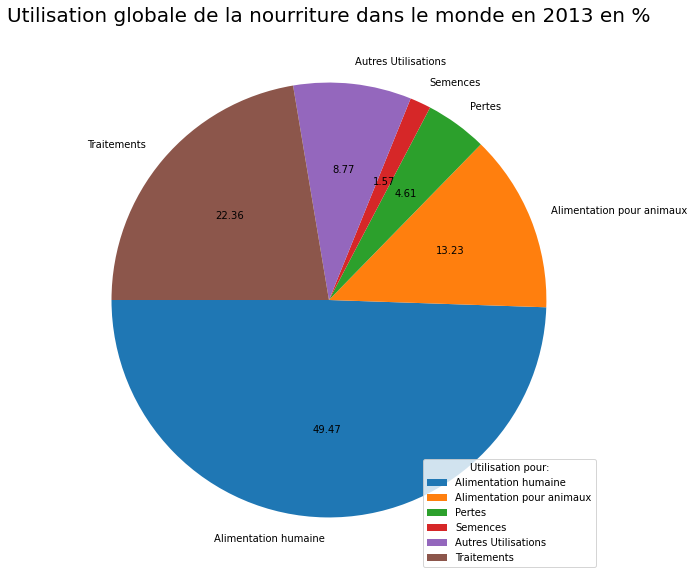

In [35]:
# Rq: La somme de ces valeurs fait un peu plus de 100 % je pense que c'est dû aux arrondis
# J'ai 100.01

import matplotlib.pyplot as plt

from matplotlib.pyplot import figure

plt.figure(figsize=(10, 10))

Y4_Marc = [Q4_Alim_humaine_pourcentage, Q4_Alim_Animaux_pourcentage, Q4_Alim_Pertes_pourcentage, Q4_Alim_Semences_pourcentage,Q4_Alim_Autres_Utilisation_pourcentage, Q4_Alim_Traitement_pourcentage]
mylabels = ["Alimentation humaine", "Alimentation pour animaux", "Pertes", "Semences","Autres Utilisations","Traitements"]

plt.pie(Y4_Marc, labels = mylabels, startangle = 180, autopct = '%.2f')

t = 20
s = t + 20

plt.legend(title = "Utilisation pour:", loc ="lower right")
plt.title('Utilisation globale de la nourriture dans le monde en 2013 en %', fontsize = t)
plt.xticks(fontsize = s)
plt.yticks(fontsize= s)
plt.show()

In [36]:
# b) par pays

Q4_Marc.head(10)

,Aliments pour animaux en millier de tonne,Autres Utilisations en millier de tonne,Disponibilité intérieur en millier de tonne,Nourriture en millier de tonne,Pertes en millier de tonne,Semences en millier de tonne,Traitement en millier de tonne
Pays,,,,,,,
Afghanistan,768.0,415.0,13515.0,10735.0,1135.0,395.0,63.0
Afrique du Sud,5309.0,876.0,61256.0,29812.0,2193.0,253.0,22819.0
Albanie,660.0,174.0,4758.0,3476.0,276.0,55.0,113.0
Algérie,4352.0,1707.0,42630.0,31729.0,3753.0,449.0,637.0
Allemagne,30209.0,7711.0,162275.0,79238.0,3781.0,1551.0,39842.0
Angola,9259.0,451.0,32029.0,15059.0,4799.0,337.0,2121.0
Antigua-et-Barbuda,0.0,20.0,79.0,58.0,0.0,0.0,0.0
Arabie saoudite,11841.0,159.0,31274.0,17956.0,1040.0,97.0,601.0
Argentine,7890.0,4194.0,114369.0,32531.0,3522.0,2416.0,63983.0


In [37]:
Q4_Marc["Alim_Animaux en %"] =  (Q4_Marc['Aliments pour animaux en millier de tonne']*100/Q4_Marc['Disponibilité intérieur en millier de tonne']).round(2)
Q4_Marc["Alim humaine en %"] = (Q4_Marc['Nourriture en millier de tonne']*100/Q4_Marc['Disponibilité intérieur en millier de tonne']).round(2)
Q4_Marc["Autres Utilisations en %"] = (Q4_Marc['Autres Utilisations en millier de tonne']*100/Q4_Marc['Disponibilité intérieur en millier de tonne']).round(2)
Q4_Marc["Pertes en %"] = (Q4_Marc['Pertes en millier de tonne']*100/Q4_Marc['Disponibilité intérieur en millier de tonne']).round(2)
Q4_Marc["Semences en %"] = (Q4_Marc['Semences en millier de tonne']*100/Q4_Marc['Disponibilité intérieur en millier de tonne']).round(2)
Q4_Marc["Traitement en %"] = (Q4_Marc['Traitement en millier de tonne']*100/Q4_Marc['Disponibilité intérieur en millier de tonne']).round(2)

Q4_Marc.head(10)

,Aliments pour animaux en millier de tonne,Autres Utilisations en millier de tonne,Disponibilité intérieur en millier de tonne,Nourriture en millier de tonne,Pertes en millier de tonne,Semences en millier de tonne,Traitement en millier de tonne,Alim_Animaux en %,Alim humaine en %,Autres Utilisations en %,Pertes en %,Semences en %,Traitement en %
Pays,,,,,,,,,,,,,
Afghanistan,768.0,415.0,13515.0,10735.0,1135.0,395.0,63.0,5.68,79.43,3.07,8.40,2.92,0.47
Afrique du Sud,5309.0,876.0,61256.0,29812.0,2193.0,253.0,22819.0,8.67,48.67,1.43,3.58,0.41,37.25
Albanie,660.0,174.0,4758.0,3476.0,276.0,55.0,113.0,13.87,73.06,3.66,5.80,1.16,2.37
Algérie,4352.0,1707.0,42630.0,31729.0,3753.0,449.0,637.0,10.21,74.43,4.00,8.80,1.05,1.49
Allemagne,30209.0,7711.0,162275.0,79238.0,3781.0,1551.0,39842.0,18.62,48.83,4.75,2.33,0.96,24.55
Angola,9259.0,451.0,32029.0,15059.0,4799.0,337.0,2121.0,28.91,47.02,1.41,14.98,1.05,6.62
Antigua-et-Barbuda,0.0,20.0,79.0,58.0,0.0,0.0,0.0,0.00,73.42,25.32,0.00,0.00,0.00
Arabie saoudite,11841.0,159.0,31274.0,17956.0,1040.0,97.0,601.0,37.86,57.42,0.51,3.33,0.31,1.92
Argentine,7890.0,4194.0,114369.0,32531.0,3522.0,2416.0,63983.0,6.90,28.44,3.67,3.08,2.11,55.94


#  Julien 1

In [39]:
# Lors de mes recherches, j’ai découvert des chiffres intéressants sur l’utilisation des céréales, 
# notamment la répartition entre l’alimentation humaine (colonne Nourriture) et l’alimentation pour animaux.
# La liste des céréales peut être trouvée en allant fouiller un peu dans l’onglet Bilans alimentaires, sur le lien
# juste ci-dessus.

# Je vais utiliser la liste de 2013, de plus la dispo alimentaire est pour l'année 2013

Cereal_2013 = pd.read_csv('2013_cereal.csv')


In [40]:
Cereal_2013.head(5)

,Code Domaine,Domaine,Code zone (FAO),Zone,Code Élément,Élément,Code Produit,Produit,Code année,Année,Unité,Valeur,Symbole,Description du Symbole
0,FBSH,"Bilans Alimentaires (-2013, ancienne méthodolo...",2,Afghanistan,5511,Production,2511,Blé et produits,2013,2013,Milliers de tonnes,5169.0,S,Données standardisées
1,FBSH,"Bilans Alimentaires (-2013, ancienne méthodolo...",2,Afghanistan,5611,Importations - Quantité,2511,Blé et produits,2013,2013,Milliers de tonnes,1173.0,S,Données standardisées
2,FBSH,"Bilans Alimentaires (-2013, ancienne méthodolo...",2,Afghanistan,5072,Variation de stock,2511,Blé et produits,2013,2013,Milliers de tonnes,-350.0,S,Données standardisées
3,FBSH,"Bilans Alimentaires (-2013, ancienne méthodolo...",2,Afghanistan,5301,Disponibilité intérieure,2511,Blé et produits,2013,2013,Milliers de tonnes,5992.0,S,Données standardisées
4,FBSH,"Bilans Alimentaires (-2013, ancienne méthodolo...",2,Afghanistan,5527,Semences,2511,Blé et produits,2013,2013,Milliers de tonnes,322.0,S,Données standardisées


In [41]:
# Voilà la liste des céréales que je veux avoir

Cereal_Liste_2013 = Cereal_2013["Produit"]
Cereal_Liste_2013 = Cereal_Liste_2013.drop_duplicates()
Cereal_Liste_2013



0         Blé et produits
11       Riz (Eq Blanchi)
21       Orge et produits
33       Maïs et produits
45     Millet et produits
54       Céréales, Autres
116    Seigle et produits
129                Avoine
153    Sorgho et produits
Name: Produit, dtype: object

In [42]:
Dispo_Alim_2013.head(10)

,Pays,Produit,Origine du produit,Aliments pour animaux en millier de tonne,Autres Utilisations en millier de tonne,Disponibilité alimentaire (Kcal/personne/jour),Disponibilité alimentaire en quantité (kg/personne/an),Disponibilité de matière grasse en quantité (g/personne/jour),Disponibilité de protéines en quantité (g/personne/jour),Disponibilité intérieur en millier de tonne,Exportations - Quantité en millier de tonne,Importations - Quantité en millier de tonne,Nourriture en millier de tonne,Pertes en millier de tonne,Production en millier de tonne,Semences en millier de tonne,Traitement en millier de tonne,Variation du stock en millier de tonne
0,Afghanistan,Abats Comestible,animale,0.0,0.0,5.0,1.72,0.20,0.77,53.0,0.0,0.0,53.0,0.0,53.0,0.0,0.0,0.0
1,Afghanistan,"Agrumes, Autres",vegetale,0.0,0.0,1.0,1.29,0.01,0.02,41.0,2.0,40.0,39.0,2.0,3.0,0.0,0.0,0.0
2,Afghanistan,Aliments pour enfants,vegetale,0.0,0.0,1.0,0.06,0.01,0.03,2.0,0.0,2.0,2.0,0.0,0.0,0.0,0.0,0.0
3,Afghanistan,Ananas,vegetale,0.0,0.0,0.0,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,Afghanistan,Bananes,vegetale,0.0,0.0,4.0,2.70,0.02,0.05,82.0,0.0,82.0,82.0,0.0,0.0,0.0,0.0,0.0
5,Afghanistan,"Beurre, Ghee",animale,0.0,0.0,23.0,1.17,2.61,0.03,36.0,0.0,0.0,36.0,0.0,36.0,0.0,0.0,0.0
6,Afghanistan,Bière,vegetale,0.0,0.0,0.0,0.09,0.00,0.00,3.0,0.0,3.0,3.0,0.0,0.0,0.0,0.0,0.0
7,Afghanistan,Blé,vegetale,0.0,0.0,1369.0,160.23,4.69,36.91,5992.0,0.0,1173.0,4895.0,775.0,5169.0,322.0,0.0,-350.0
8,Afghanistan,Boissons Alcooliques,vegetale,0.0,0.0,0.0,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,Afghanistan,Café,vegetale,0.0,0.0,0.0,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [43]:
Q1_Julien = Dispo_Alim_2013[['Produit','Aliments pour animaux en millier de tonne','Nourriture en millier de tonne']].groupby(['Produit']).sum()
Q1_Julien.head(10)

# J'ai mon dataframe de prêt je n'ai plus qu'à sélectionner les index des céréales que je veux

,Aliments pour animaux en millier de tonne,Nourriture en millier de tonne
Produit,,
Abats Comestible,1009.0,15669.0
"Agrumes, Autres",0.0,11359.0
"Alcool, non Comestible",0.0,0.0
Aliments pour enfants,0.0,761.0
Ananas,0.0,20757.0
Animaux Aquatiques Autre,0.0,1249.0
Arachides Decortiquees,1.0,12202.0
Avoine,16251.0,3903.0
Bananes,871.0,85954.0


In [44]:
Q1_Julien.index

Index(['Abats Comestible', 'Agrumes, Autres', 'Alcool, non Comestible',
       'Aliments pour enfants', 'Ananas', 'Animaux Aquatiques Autre',
       'Arachides Decortiquees', 'Avoine', 'Bananes', 'Bananes plantains',
       'Beurre, Ghee', 'Bière', 'Blé', 'Boissons Alcooliques',
       'Boissons Fermentés', 'Café', 'Cephalopodes', 'Citrons & Limes',
       'Coco (Incl Coprah)', 'Crustacés', 'Crème', 'Céréales, Autres',
       'Dattes', 'Edulcorants Autres', 'Feve de Cacao', 'Fruits, Autres',
       'Girofles', 'Graines Colza/Moutarde', 'Graines de coton',
       'Graines de tournesol', 'Graisses Animales Crue', 'Haricots',
       'Huil Plantes Oleif Autr', 'Huile Graines de Coton', 'Huile d'Arachide',
       'Huile d'Olive', 'Huile de Coco', 'Huile de Colza&Moutarde',
       'Huile de Germe de Maïs', 'Huile de Palme', 'Huile de Palmistes',
       'Huile de Soja', 'Huile de Son de Riz', 'Huile de Sésame',
       'Huile de Tournesol', 'Huiles de Foie de Poisso', 'Huiles de Poissons',
   

In [45]:
Cereal_Liste_2013

# Pour rappel voilà les 9 céréales que je veux

0         Blé et produits
11       Riz (Eq Blanchi)
21       Orge et produits
33       Maïs et produits
45     Millet et produits
54       Céréales, Autres
116    Seigle et produits
129                Avoine
153    Sorgho et produits
Name: Produit, dtype: object

In [46]:
# Donc là je vais essayer de comparer entre ma liste de céréale 2013 
# et les index je vais essayer de la faire de manière automatique pour afficher que les lignes des céréales qui
# m'intéresse

# Ensuite je regarderai dans les 2 colonnes ces 2 chiffres (Alimentation humaine et l'alimentation pour les animaux)
# et essayer de conclure un truc

Q1_Julien.loc[Cereal_Liste_2013[11]]

# On voit que cela marche

Aliments pour animaux en millier de tonne     33594.0
Nourriture en millier de tonne               377286.0
Name: Riz (Eq Blanchi), dtype: float64

In [47]:
# Q1_Julien.loc[Cereal_Liste_2013[21]]

# Le code ci-dessus fait une erreur
# Mais pas pour toutes les valeurs car dans Q1_Julien c'est "Orge" et pas "Orge et produits"

In [48]:
# Q1_Julien.loc[Cereal_Liste_2013[0]]

# De plus j'ai un changement avec les accents qui me pose pb

In [49]:
# Je vais créer manuellement une nouvelle liste pour que tout marche en attenbdant
# de savoir le faire automatiquement

Cereal_Liste_OK = []
Cereal_Liste_OK = ['Blé',
                  Cereal_Liste_2013[11],
                  "Orge",
                  "Maïs",
                  "Millet",
                  Cereal_Liste_2013[54],
                  "Seigle",
                  Cereal_Liste_2013[129],
                  'Sorgho']
Cereal_Liste_OK

# toujours les pb d'encodage avec les accents

['Blé',
 'Riz (Eq Blanchi)',
 'Orge',
 'Maïs',
 'Millet',
 'Céréales, Autres',
 'Seigle',
 'Avoine',
 'Sorgho']

In [50]:
# Je vais prendre toutes les données pour faire un graphique récapitulatif

Ble = Q1_Julien.loc[Cereal_Liste_OK[0]]
Ble

# Mais malgré le pb d'encodage à l'affichage les comparaisons marchent. Donc je vais continuer comme cela

Aliments pour animaux en millier de tonne    129668.0
Nourriture en millier de tonne               457824.0
Name: Blé, dtype: float64

In [51]:
Riz = Q1_Julien.loc[Cereal_Liste_OK[1]]
Riz

Aliments pour animaux en millier de tonne     33594.0
Nourriture en millier de tonne               377286.0
Name: Riz (Eq Blanchi), dtype: float64

In [52]:
Orge = Q1_Julien.loc[Cereal_Liste_OK[2]]
Orge

Aliments pour animaux en millier de tonne    92658.0
Nourriture en millier de tonne                6794.0
Name: Orge, dtype: float64

In [53]:
Mais = Q1_Julien.loc[Cereal_Liste_OK[3]]
Mais

Aliments pour animaux en millier de tonne    546116.0
Nourriture en millier de tonne               125184.0
Name: Maïs, dtype: float64

In [54]:
Millet = Q1_Julien.loc[Cereal_Liste_OK[4]]
Millet

Aliments pour animaux en millier de tonne     3306.0
Nourriture en millier de tonne               23040.0
Name: Millet, dtype: float64

In [55]:
Autres_Cereale = Q1_Julien.loc[Cereal_Liste_OK[5]]
Autres_Cereale

Aliments pour animaux en millier de tonne    19035.0
Nourriture en millier de tonne                5324.0
Name: Céréales, Autres, dtype: float64

In [56]:
Seigle = Q1_Julien.loc[Cereal_Liste_OK[6]]
Seigle

Aliments pour animaux en millier de tonne    8099.0
Nourriture en millier de tonne               5502.0
Name: Seigle, dtype: float64

In [57]:
Avoine = Q1_Julien.loc[Cereal_Liste_OK[7]]
Avoine

Aliments pour animaux en millier de tonne    16251.0
Nourriture en millier de tonne                3903.0
Name: Avoine, dtype: float64

In [58]:
Sorgho = Q1_Julien.loc[Cereal_Liste_OK[8]]
Sorgho

Aliments pour animaux en millier de tonne    24808.0
Nourriture en millier de tonne               24153.0
Name: Sorgho, dtype: float64

In [59]:
#POur pouvoir tracer le graphique je dois mettre l'axe des x en unicode avec le u

XQ1_Julien = [u"Blé",u"Riz",u"Orge",u"Maïs",u"Millet",u"Autres_Céréale",u"Seigle",u"Avoine",u"Sorgho"]


In [60]:
YQ1_Julien_Animaux =[Ble[0],Riz[0],Orge[0],Mais[0],Millet[0],Autres_Cereale[0],Seigle[0],Avoine[0],Sorgho[0]]
YQ1_Julien_Animaux

[129668.0,
 33594.0,
 92658.0,
 546116.0,
 3306.0,
 19035.0,
 8099.0,
 16251.0,
 24808.0]

In [61]:
YQ1_Julien_Humain = [Ble[1],Riz[1],Orge[1],Mais[1],Millet[1],Autres_Cereale[1],Seigle[1],Avoine[1],Sorgho[1]]
YQ1_Julien_Humain

[457824.0,
 377286.0,
 6794.0,
 125184.0,
 23040.0,
 5324.0,
 5502.0,
 3903.0,
 24153.0]

(array([     0., 100000., 200000., 300000., 400000., 500000., 600000.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

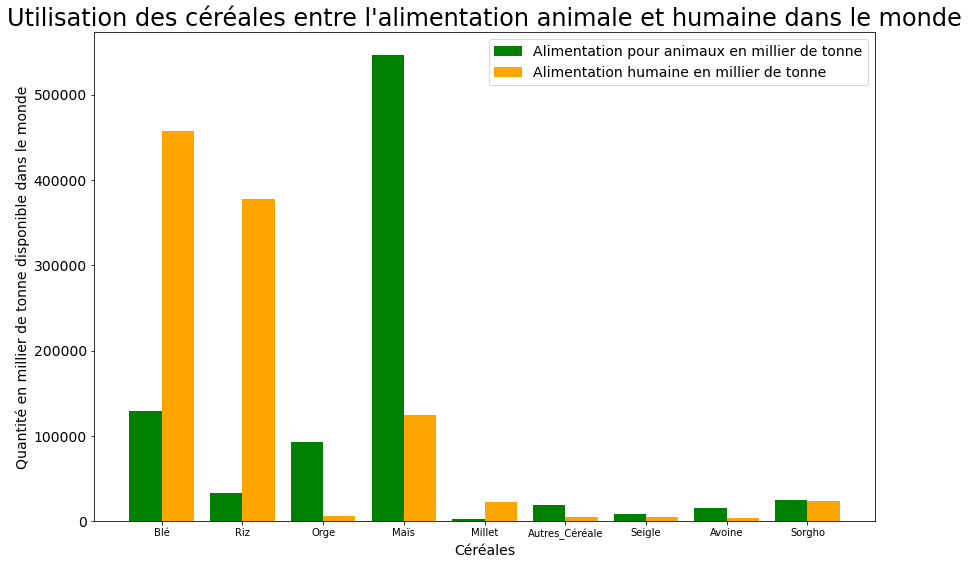

In [62]:
# Taille de la figure

fs = 14

plt.figure(figsize=(fs,fs-5))

# X axis pour permettre de de mettre côte à côte les 2 histogrammes
X_axis = np.arange(len(XQ1_Julien))
plt.bar(X_axis-0.2,YQ1_Julien_Animaux, 0.4, color ='green')
plt.bar(X_axis+0.2,YQ1_Julien_Humain, 0.4, color ='orange')

plt.xlabel(u"Céréales", fontsize = fs)
plt.ylabel(u"Quantité en millier de tonne disponible dans le monde", fontsize = fs)
plt.title(u"Utilisation des céréales entre l'alimentation animale et humaine dans le monde", fontsize = fs + 10)
plt.legend(["Alimentation pour animaux en millier de tonne", "Alimentation humaine en millier de tonne"], fontsize = fs, loc = "upper right")
plt.xticks(X_axis, XQ1_Julien)
plt.yticks(fontsize=fs)


In [63]:
# Méthode 2 Faire des masques et ensuite afficher le résultat dans le dataframe

# est-ce mieux de faire cela comme cela ou pas ? je pense en faisant masuqe 1 & masque 2 ....
# et enuite le group by

# D'après le mentor oui c'est mieux

Masque_Ble = Dispo_Alim_2013["Produit"]=="Blé"
Dispo_Alim_2013[Masque_Ble].head(10)

,Pays,Produit,Origine du produit,Aliments pour animaux en millier de tonne,Autres Utilisations en millier de tonne,Disponibilité alimentaire (Kcal/personne/jour),Disponibilité alimentaire en quantité (kg/personne/an),Disponibilité de matière grasse en quantité (g/personne/jour),Disponibilité de protéines en quantité (g/personne/jour),Disponibilité intérieur en millier de tonne,Exportations - Quantité en millier de tonne,Importations - Quantité en millier de tonne,Nourriture en millier de tonne,Pertes en millier de tonne,Production en millier de tonne,Semences en millier de tonne,Traitement en millier de tonne,Variation du stock en millier de tonne
7,Afghanistan,Blé,vegetale,0.0,0.0,1369.0,160.23,4.69,36.91,5992.0,0.0,1173.0,4895.0,775.0,5169.0,322.0,0.0,-350.0
72,Afrique du Sud,Blé,vegetale,37.0,0.0,492.0,60.13,2.09,15.40,3316.0,495.0,1490.0,3174.0,74.0,1870.0,31.0,0.0,450.0
167,Albanie,Blé,vegetale,18.0,130.0,1056.0,138.64,5.85,33.64,650.0,4.0,360.0,440.0,44.0,294.0,18.0,0.0,0.0
259,Algérie,Blé,vegetale,545.0,820.0,1424.0,185.42,5.34,42.97,9461.0,2.0,6343.0,7270.0,672.0,3299.0,153.0,0.0,-180.0
352,Allemagne,Blé,vegetale,7494.0,774.0,654.0,83.41,2.59,21.17,16491.0,10870.0,5421.0,6900.0,663.0,25019.0,571.0,90.0,-3079.0
445,Angola,Blé,vegetale,0.0,0.0,286.0,40.72,1.04,8.67,898.0,0.0,972.0,874.0,23.0,4.0,0.0,0.0,-79.0
526,Antigua-et-Barbuda,Blé,vegetale,0.0,1.0,498.0,62.06,4.84,13.49,7.0,0.0,9.0,6.0,0.0,0.0,0.0,0.0,-2.0
618,Arabie saoudite,Blé,vegetale,139.0,0.0,797.0,89.47,4.62,23.86,2789.0,259.0,2484.0,2579.0,56.0,660.0,15.0,0.0,-96.0
712,Argentine,Blé,vegetale,0.0,19.0,877.0,103.11,2.42,23.37,5251.0,2615.0,4.0,4273.0,424.0,9315.0,534.0,0.0,-1453.0
805,Arménie,Blé,vegetale,93.0,0.0,1024.0,130.60,3.60,30.52,554.0,1.0,361.0,389.0,32.0,312.0,30.0,10.0,-118.0


#  Julien 2

In [64]:

# Demande 5 Marc
# j’imagine que Julien t’a laissé quelques pistes, dans le document, que tu pourras exploiter:

#Julien: "Enfin, je me souviens d’un exemple étonnant d’utilisation du manioc par la Thaïlande aux égards
# de la proportion de personnes en sous-nutrition. Il serait intéressant d’aller à nouveau y jeter un coup d’œil,
# de mémoire ça concernait l’exportation par rapport à la production."

Dispo_Alim_2013.head(5)


,Pays,Produit,Origine du produit,Aliments pour animaux en millier de tonne,Autres Utilisations en millier de tonne,Disponibilité alimentaire (Kcal/personne/jour),Disponibilité alimentaire en quantité (kg/personne/an),Disponibilité de matière grasse en quantité (g/personne/jour),Disponibilité de protéines en quantité (g/personne/jour),Disponibilité intérieur en millier de tonne,Exportations - Quantité en millier de tonne,Importations - Quantité en millier de tonne,Nourriture en millier de tonne,Pertes en millier de tonne,Production en millier de tonne,Semences en millier de tonne,Traitement en millier de tonne,Variation du stock en millier de tonne
0,Afghanistan,Abats Comestible,animale,0.0,0.0,5.0,1.72,0.20,0.77,53.0,0.0,0.0,53.0,0.0,53.0,0.0,0.0,0.0
1,Afghanistan,"Agrumes, Autres",vegetale,0.0,0.0,1.0,1.29,0.01,0.02,41.0,2.0,40.0,39.0,2.0,3.0,0.0,0.0,0.0
2,Afghanistan,Aliments pour enfants,vegetale,0.0,0.0,1.0,0.06,0.01,0.03,2.0,0.0,2.0,2.0,0.0,0.0,0.0,0.0,0.0
3,Afghanistan,Ananas,vegetale,0.0,0.0,0.0,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,Afghanistan,Bananes,vegetale,0.0,0.0,4.0,2.70,0.02,0.05,82.0,0.0,82.0,82.0,0.0,0.0,0.0,0.0,0.0


In [65]:
masque_manioc = Dispo_Alim_2013["Produit"] == "Manioc"
Dispo_Alim_2013[masque_manioc].head(10)

,Pays,Produit,Origine du produit,Aliments pour animaux en millier de tonne,Autres Utilisations en millier de tonne,Disponibilité alimentaire (Kcal/personne/jour),Disponibilité alimentaire en quantité (kg/personne/an),Disponibilité de matière grasse en quantité (g/personne/jour),Disponibilité de protéines en quantité (g/personne/jour),Disponibilité intérieur en millier de tonne,Exportations - Quantité en millier de tonne,Importations - Quantité en millier de tonne,Nourriture en millier de tonne,Pertes en millier de tonne,Production en millier de tonne,Semences en millier de tonne,Traitement en millier de tonne,Variation du stock en millier de tonne
110,Afrique du Sud,Manioc,vegetale,0.0,57.0,0.0,0.00,0.00,0.00,57.0,2.0,58.0,0.0,0.0,0.0,0.0,0.0,1.0
203,Albanie,Manioc,vegetale,0.0,0.0,0.0,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
295,Algérie,Manioc,vegetale,0.0,0.0,0.0,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
390,Allemagne,Manioc,vegetale,1.0,26.0,0.0,0.00,0.00,0.00,27.0,14.0,41.0,0.0,0.0,0.0,0.0,0.0,0.0
475,Angola,Manioc,vegetale,8880.0,0.0,560.0,197.90,0.60,4.72,16412.0,0.0,0.0,4249.0,3282.0,16412.0,0.0,0.0,0.0
563,Antigua-et-Barbuda,Manioc,vegetale,0.0,0.0,4.0,1.40,0.00,0.03,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
655,Arabie saoudite,Manioc,vegetale,2.0,0.0,0.0,0.00,0.00,0.00,2.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0
749,Argentine,Manioc,vegetale,90.0,18.0,5.0,1.89,0.01,0.03,202.0,0.0,18.0,78.0,16.0,184.0,0.0,0.0,0.0
841,Arménie,Manioc,vegetale,0.0,0.0,0.0,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
933,Australie,Manioc,vegetale,0.0,87.0,0.0,0.20,0.00,0.00,91.0,0.0,91.0,5.0,0.0,0.0,0.0,0.0,0.0


In [66]:
masque_thailande = Dispo_Alim_2013["Pays"] == "Thaïlande"
Dispo_Alim_2013[masque_thailande].head(10)

,Pays,Produit,Origine du produit,Aliments pour animaux en millier de tonne,Autres Utilisations en millier de tonne,Disponibilité alimentaire (Kcal/personne/jour),Disponibilité alimentaire en quantité (kg/personne/an),Disponibilité de matière grasse en quantité (g/personne/jour),Disponibilité de protéines en quantité (g/personne/jour),Disponibilité intérieur en millier de tonne,Exportations - Quantité en millier de tonne,Importations - Quantité en millier de tonne,Nourriture en millier de tonne,Pertes en millier de tonne,Production en millier de tonne,Semences en millier de tonne,Traitement en millier de tonne,Variation du stock en millier de tonne
13759,Thaïlande,Abats Comestible,animale,0.0,0.0,3.0,1.11,0.09,0.56,74.0,5.0,33.0,75.0,0.0,45.0,0.0,0.0,0.0
13760,Thaïlande,"Agrumes, Autres",vegetale,0.0,0.0,0.0,0.09,0.00,0.00,8.0,6.0,2.0,6.0,0.0,12.0,0.0,2.0,0.0
13761,Thaïlande,"Alcool, non Comestible",vegetale,0.0,358.0,0.0,0.00,0.00,0.00,358.0,110.0,21.0,0.0,0.0,447.0,0.0,0.0,0.0
13762,Thaïlande,Aliments pour enfants,vegetale,0.0,0.0,2.0,0.18,0.01,0.08,12.0,7.0,19.0,12.0,0.0,0.0,0.0,0.0,0.0
13763,Thaïlande,Ananas,vegetale,0.0,0.0,10.0,10.02,0.04,0.08,782.0,1449.0,9.0,671.0,110.0,2209.0,0.0,0.0,13.0
13764,Thaïlande,Animaux Aquatiques Autre,animale,0.0,0.0,1.0,1.28,0.01,0.14,86.0,25.0,1.0,86.0,0.0,110.0,0.0,0.0,0.0
13765,Thaïlande,Arachides Decortiquees,vegetale,0.0,0.0,9.0,0.59,0.71,0.37,97.0,5.0,69.0,39.0,2.0,33.0,2.0,53.0,0.0
13766,Thaïlande,Avoine,vegetale,0.0,0.0,0.0,0.01,0.00,0.00,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0
13767,Thaïlande,Bananes,vegetale,0.0,0.0,26.0,15.11,0.08,0.33,1174.0,446.0,20.0,1012.0,162.0,1600.0,0.0,0.0,0.0
13768,Thaïlande,"Beurre, Ghee",animale,0.0,0.0,4.0,0.17,0.46,0.00,11.0,1.0,12.0,11.0,0.0,0.0,0.0,0.0,0.0


In [67]:
# Bon maintenant les deux masques ensemble avec &

Dispo_Alim_2013[masque_manioc & masque_thailande]

,Pays,Produit,Origine du produit,Aliments pour animaux en millier de tonne,Autres Utilisations en millier de tonne,Disponibilité alimentaire (Kcal/personne/jour),Disponibilité alimentaire en quantité (kg/personne/an),Disponibilité de matière grasse en quantité (g/personne/jour),Disponibilité de protéines en quantité (g/personne/jour),Disponibilité intérieur en millier de tonne,Exportations - Quantité en millier de tonne,Importations - Quantité en millier de tonne,Nourriture en millier de tonne,Pertes en millier de tonne,Production en millier de tonne,Semences en millier de tonne,Traitement en millier de tonne,Variation du stock en millier de tonne
13809,Thaïlande,Manioc,vegetale,1800.0,2081.0,40.0,13.0,0.05,0.14,6264.0,25214.0,1250.0,871.0,1511.0,30228.0,0.0,0.0,0.0


In [68]:
masque_thailande_sous_nutrition = Sous_Nutrition["Pays"]== "Thaïlande"
Sous_Nutrition[masque_thailande_sous_nutrition]

# Ouhah je ne comprends pas pourquoi ! Ils produisent suffisamment pour se nourrir mais peut-être n'ont t-ils pas le pouvoir d'achat
# pour acheter cette nourriture et elle est alors exportée ?

# La production aussi appartient peut-être à des entreprises qui veulent exportée et pas à la population fermière

,Pays,Plage_Années,Nbres Personnes Sous-alimentées en millier habitant
1110,Thaïlande,2012-2014,6200.0
1111,Thaïlande,2013-2015,6000.0
1112,Thaïlande,2014-2016,5900.0
1113,Thaïlande,2015-2017,6000.0
1114,Thaïlande,2016-2018,6200.0
1115,Thaïlande,2017-2019,6500.0


# Demandes de Mélanie

In [69]:
# Demande de Mélanie

# Je souhaiterais avoir une étude un peu plus fine pour chacun des pays.


# Demande 1 Mélanie

In [70]:

# Demade 1 Mélanie: j’aimerais que tu puisses nous donner les pays pour lesquels la proportion de 
# personnes sous-alimentées est la plus forte en 2017

Q1_Rep.head(20)

# J'avais déjà trouvé la réponse avec la demande 1 de Marc


,Pays,Nbres Personnes Sous-alimentées en millier habitant,Année,Population par millier habitant,Proportion en pourcentage pour 2017 de personnes sous-alimentées
69,Haïti,5300.0,2017,10982.37,48.26
142,République populaire démocratique de Corée,12000.0,2017,25429.82,47.19
96,Madagascar,10500.0,2017,25570.51,41.06
92,Libéria,1800.0,2017,4702.23,38.28
89,Lesotho,800.0,2017,2091.53,38.25
165,Tchad,5700.0,2017,15016.75,37.96
146,Rwanda,4200.0,2017,11980.96,35.06
108,Mozambique,9400.0,2017,28649.02,32.81
168,Timor-Leste,400.0,2017,1243.26,32.17
0,Afghanistan,10500.0,2017,36296.11,28.93


# Demande 2 Mélanie

In [71]:
# Demande 2 Mélanie 
# ceux qui ont le plus bénéficié d’aide depuis 2013

# Question parfois je n'arrive pas à faire plusieurs étape en même temps et je les fais à la suite est-ce normal ?

Q2_Melanie_groupby = Aide_Alim.groupby(['Pays']).sum()
Q2_Melanie_groupby_drop = Q2_Melanie_groupby.drop(['Année'],axis=1)
Q2_Melanie_groupby_drop_sort = Q2_Melanie_groupby_drop.sort_values(['Quantité donnée en tonne'],ascending=False)
Q2_Melanie_groupby_drop_sort = Q2_Melanie_groupby_drop_sort.rename(columns={'Quantité donnée en tonne':'Quantité donnée en sommant en tonne de 2013 à 2016',
                            })
Q2_Melanie_groupby_drop_sort.head(10)

,Quantité donnée en sommant en tonne de 2013 à 2016
Pays,
République arabe syrienne,1858943
Éthiopie,1381294
Yémen,1206484
Soudan du Sud,695248
Soudan,669784
Kenya,552836
Bangladesh,348188
Somalie,292678
République démocratique du Congo,288502


In [72]:

Q2_Melanie = Aide_Alim.pivot_table('Quantité donnée en tonne',index='Pays',columns='Année', aggfunc="sum")

Q2_Melanie = Q2_Melanie.rename(columns={2013:'tonne donnée en 2013',
                              2014:'tonne donnée en 2014',
                              2015:'tonne donnée en 2015',
                              2016:'tonne donnée en 2016'})

Q2_Melanie.head(10)

Année,tonne donnée en 2013,tonne donnée en 2014,tonne donnée en 2015,tonne donnée en 2016
Pays,,,,
Afghanistan,128238.0,57214.0,NaN,NaN
Algérie,35234.0,18980.0,17424.0,9476.0
Angola,5000.0,14.0,NaN,NaN
Bangladesh,131018.0,194628.0,22542.0,NaN
Bhoutan,1724.0,146.0,578.0,218.0
Bolivie (État plurinational de),NaN,6.0,NaN,NaN
Burkina Faso,18620.0,22938.0,23182.0,72.0
Burundi,53372.0,11010.0,12936.0,NaN
Bénin,17622.0,672.0,3786.0,144.0


In [73]:

Q2_Melanie_2013 = Q2_Melanie.sort_values(['tonne donnée en 2013'],ascending = False)

Q2_Melanie_2013.head(10)


Année,tonne donnée en 2013,tonne donnée en 2014,tonne donnée en 2015,tonne donnée en 2016
Pays,,,,
Éthiopie,591404.0,586624.0,203266.0,NaN
République arabe syrienne,563566.0,651870.0,524949.0,118558.0
Soudan,330230.0,321904.0,17650.0,NaN
Yémen,264764.0,103840.0,372306.0,465574.0
Kenya,220966.0,217418.0,114452.0,NaN
Soudan du Sud,196330.0,450610.0,48308.0,NaN
République démocratique du Congo,150320.0,70134.0,68048.0,NaN
Somalie,139800.0,81180.0,71698.0,NaN
Bangladesh,131018.0,194628.0,22542.0,NaN


<AxesSubplot:xlabel='Pays'>

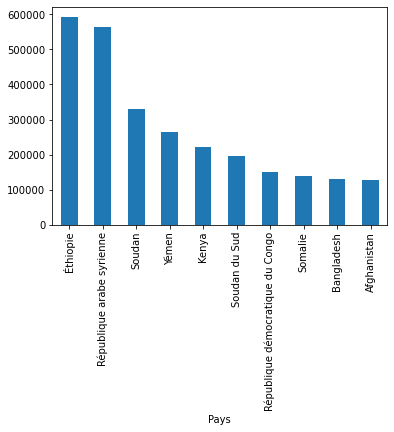

In [74]:
Q2_Melanie_2013['tonne donnée en 2013'].head(10).plot.bar()

In [75]:
Q2_Melanie_2014 = Q2_Melanie.sort_values(['tonne donnée en 2014'],ascending = False)

Q2_Melanie_2014.head(10)

Année,tonne donnée en 2013,tonne donnée en 2014,tonne donnée en 2015,tonne donnée en 2016
Pays,,,,
République arabe syrienne,563566.0,651870.0,524949.0,118558.0
Éthiopie,591404.0,586624.0,203266.0,NaN
Soudan du Sud,196330.0,450610.0,48308.0,NaN
Soudan,330230.0,321904.0,17650.0,NaN
Kenya,220966.0,217418.0,114452.0,NaN
Bangladesh,131018.0,194628.0,22542.0,NaN
Pakistan,101364.0,110268.0,19440.0,NaN
Philippines,62164.0,105424.0,4134.0,NaN
Yémen,264764.0,103840.0,372306.0,465574.0


In [76]:
Q2_Melanie_2015 = Q2_Melanie.sort_values(['tonne donnée en 2015'],ascending = False)

Q2_Melanie_2015.head(10)

Année,tonne donnée en 2013,tonne donnée en 2014,tonne donnée en 2015,tonne donnée en 2016
Pays,,,,
République arabe syrienne,563566.0,651870.0,524949.0,118558.0
Yémen,264764.0,103840.0,372306.0,465574.0
Éthiopie,591404.0,586624.0,203266.0,NaN
Kenya,220966.0,217418.0,114452.0,NaN
Tchad,93930.0,97926.0,73678.0,2432.0
Somalie,139800.0,81180.0,71698.0,NaN
République populaire démocratique de Corée,71324.0,43182.0,70506.0,2400.0
République démocratique du Congo,150320.0,70134.0,68048.0,NaN
Niger,62720.0,66226.0,54656.0,92742.0


In [77]:
Q2_Melanie_2016 = Q2_Melanie.sort_values(['tonne donnée en 2016'],ascending = False)

Q2_Melanie_2016.head(10)

Année,tonne donnée en 2013,tonne donnée en 2014,tonne donnée en 2015,tonne donnée en 2016
Pays,,,,
Yémen,264764.0,103840.0,372306.0,465574.0
République arabe syrienne,563566.0,651870.0,524949.0,118558.0
Niger,62720.0,66226.0,54656.0,92742.0
Haïti,61214.0,33108.0,9666.0,12462.0
Algérie,35234.0,18980.0,17424.0,9476.0
Côte d'Ivoire,22582.0,9922.0,12648.0,8786.0
Colombie,11442.0,9196.0,6642.0,5466.0
Honduras,27136.0,10598.0,12506.0,4492.0
Libye,NaN,596.0,4278.0,4414.0


## Résumé investigation Q2 Mélanie

# Par année ce qui ont eu le plus d'aide

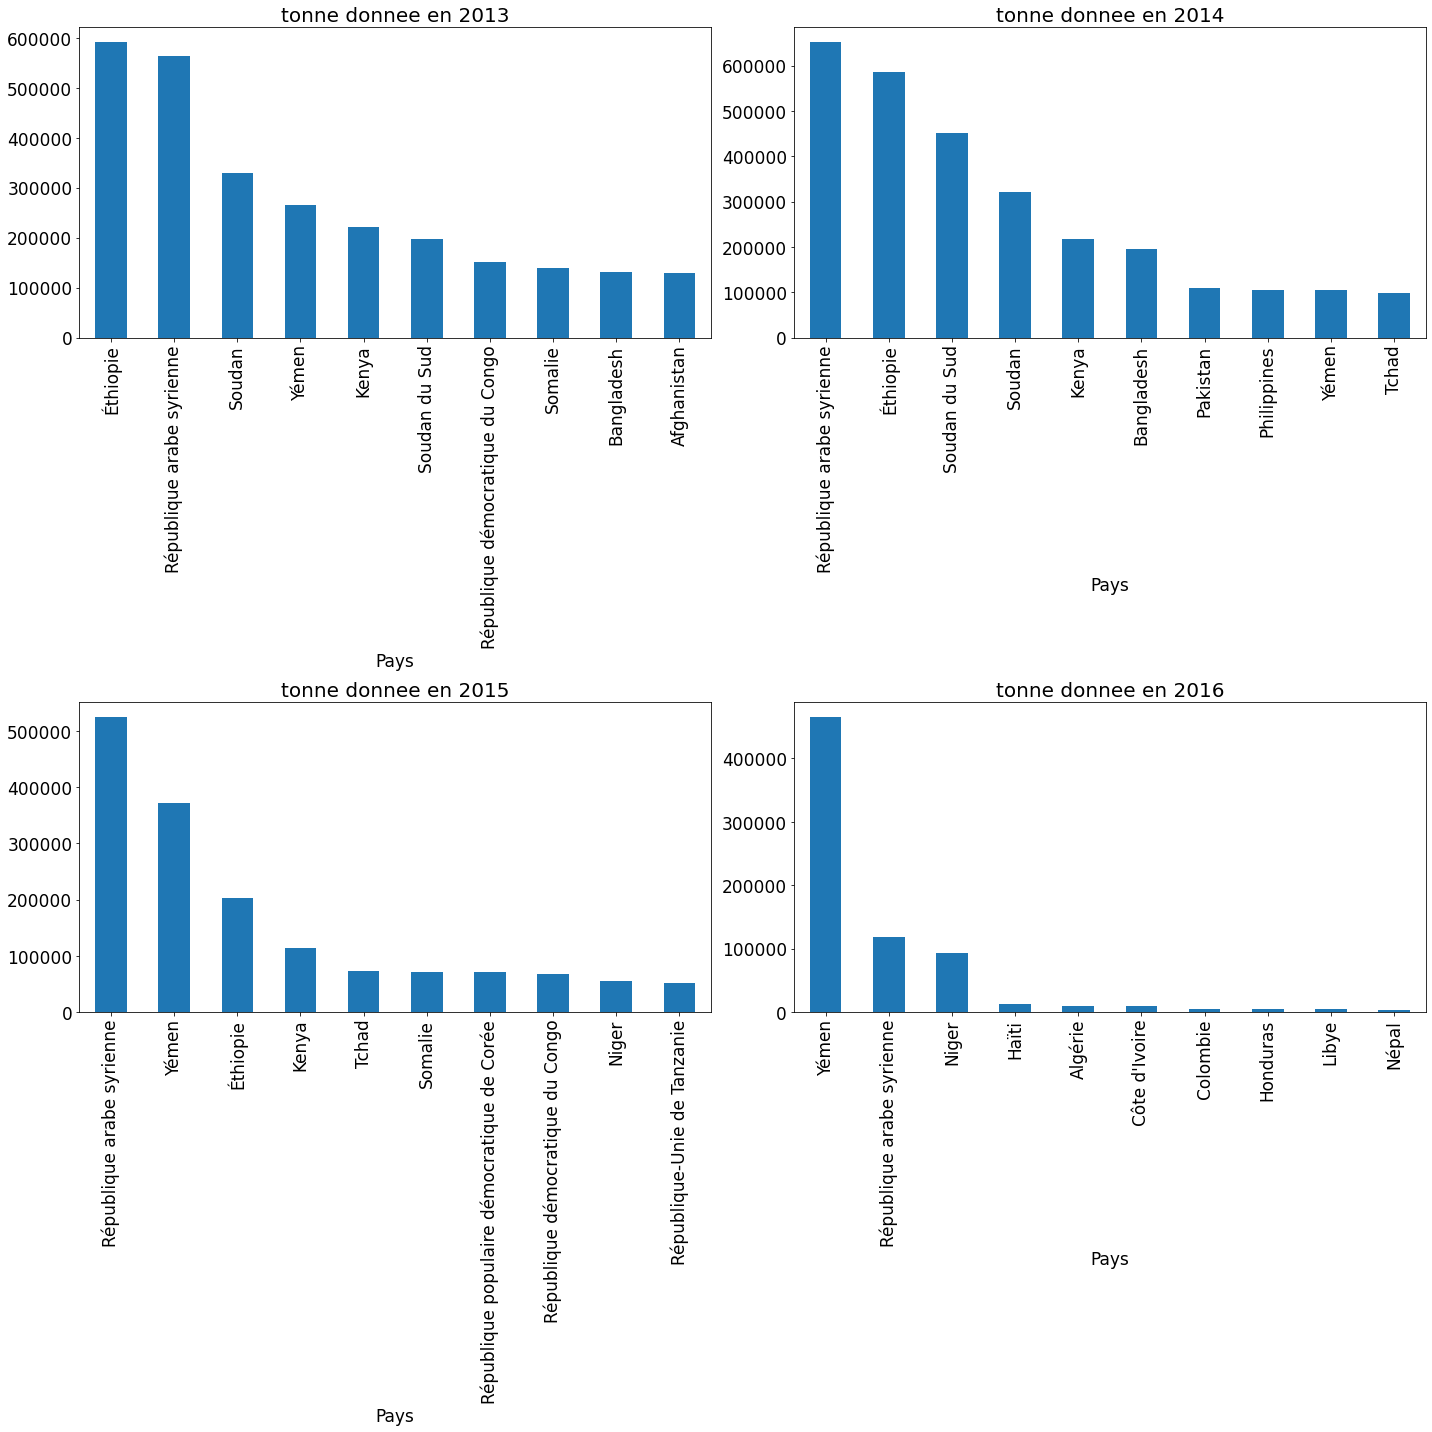

In [78]:
import matplotlib.pyplot as plt

from matplotlib.pyplot import figure

plt.figure(figsize=(20, 20))

# La taille des labels sur l'axe x
s= 17

#courbe en haut à gauche

plt.subplot(2,2,1)
Q2_Melanie_2013['tonne donnée en 2013'].head(10).plot.bar()
plt.xticks(fontsize=s)
plt.yticks(fontsize=s)
plt.xlabel("Pays",fontsize=s)
plt.title('tonne donnee en 2013', fontsize = 20)

#courbe en haut à droite

plt.subplot(2,2,2)
Q2_Melanie_2014['tonne donnée en 2014'].head(10).plot.bar()
plt.xticks(fontsize=s)
plt.yticks(fontsize=s)
plt.xlabel("Pays",fontsize=s)
plt.title('tonne donnee en 2014', fontsize=20)

# courbe en bas à gauche

plt.subplot(2,2,3)
Q2_Melanie_2015['tonne donnée en 2015'].head(10).plot.bar()
plt.xticks(fontsize=s)
plt.yticks(fontsize=s)
plt.xlabel("Pays",fontsize=s)
plt.title('tonne donnee en 2015', fontsize = 20)

# courbe en bas à droite

plt.subplot(2,2,4)
Q2_Melanie_2016['tonne donnée en 2016'].head(10).plot.bar()
plt.xticks(fontsize=s)
plt.yticks(fontsize=s)
plt.xlabel("Pays",fontsize=s)
plt.title('tonne donnee en 2016', fontsize = 20)

plt.tight_layout()

# Je peux essayer de mettre les mêmes couleurs pour chaque pays !!!


# Au global de 2013 à 2016

Text(0.5, 1.0, "Les pays ayant reçu le plus d'aide de 2013 à 2016 inclus")

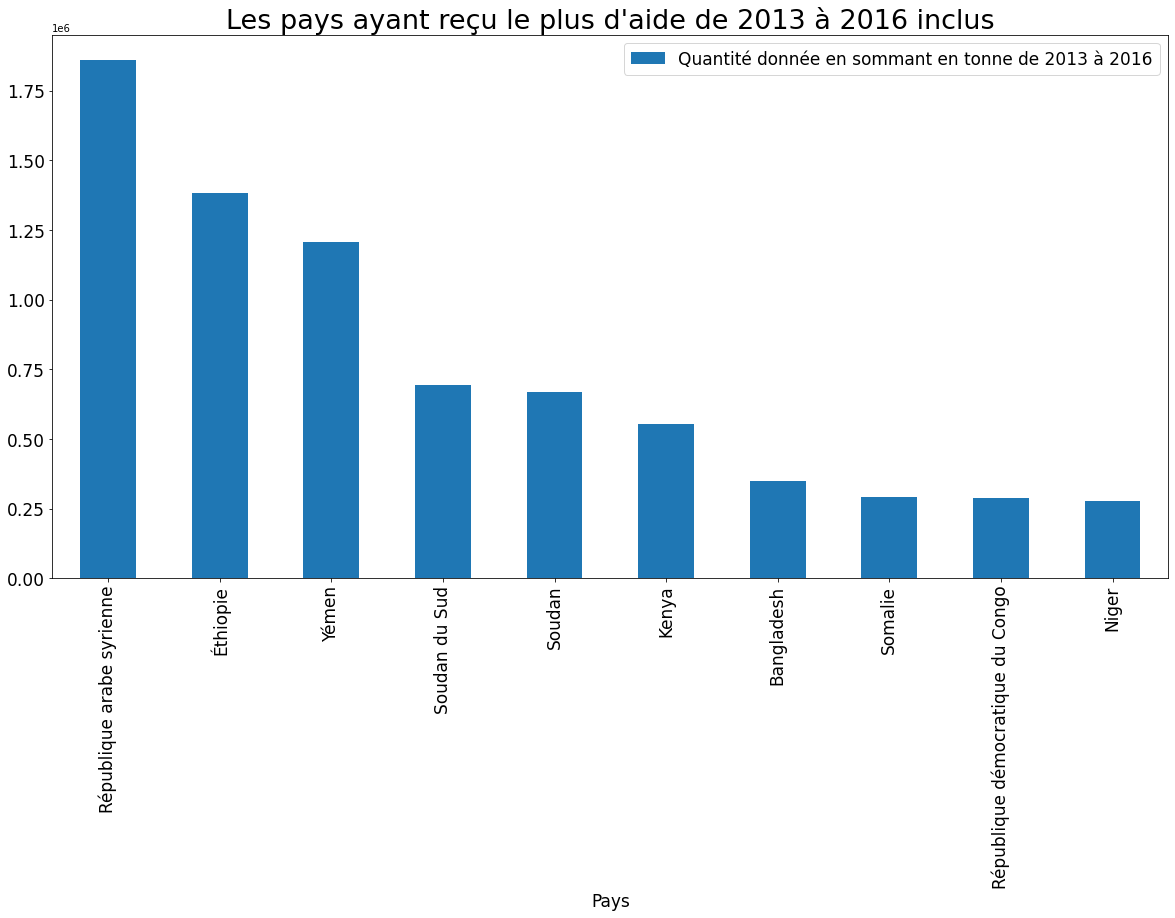

In [79]:

Q2_Melanie_groupby_drop_sort.head(10).plot.bar(figsize=(20,10))
s= 17
plt.xticks(fontsize=s)
plt.yticks(fontsize=s)
plt.xlabel("Pays",fontsize=s)
plt.legend(fontsize=s)
plt.title(u"Les pays ayant reçu le plus d'aide de 2013 à 2016 inclus", fontsize = s + 10)

# Au global de 2013 à 2015

Text(0.5, 1.0, "Les pays ayant reçu le plus d'aide de 2013 à 2015 inclus")

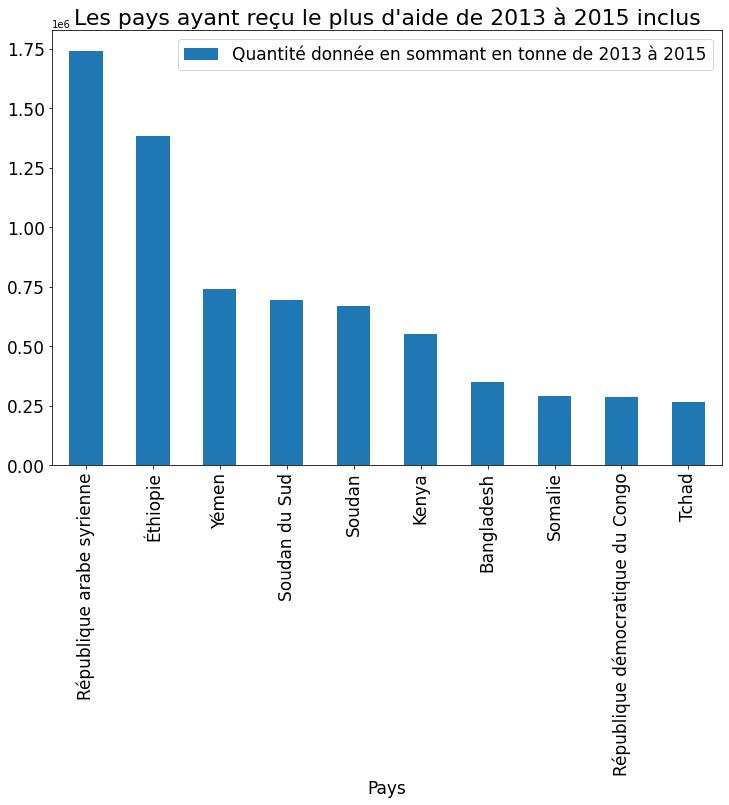

In [80]:
#J'enlève l'année 2016 car il y a beaucoup de Nan

masque_aide_2016 = Aide_Alim['Année']==2016
Aide_Alim_2013_2015 = Aide_Alim[-masque_aide_2016]

Q2_Melanie_2013_2015 = Aide_Alim_2013_2015.groupby(['Pays']).sum()
Q2_Melanie_2013_2015 = Q2_Melanie_2013_2015.drop(['Année'],axis=1)
Q2_Melanie_2013_2015 = Q2_Melanie_2013_2015.sort_values(['Quantité donnée en tonne'],ascending=False)
Q2_Melanie_2013_2015 = Q2_Melanie_2013_2015.rename(columns={'Quantité donnée en tonne':'Quantité donnée en sommant en tonne de 2013 à 2015',
                            })
Q2_Melanie_2013_2015.head(10).plot.bar(figsize=(12,8))
s= 17
plt.xticks(fontsize=s)
plt.yticks(fontsize=s)
plt.xlabel("Pays",fontsize=s)
plt.legend(fontsize=s)
plt.title(u"Les pays ayant reçu le plus d'aide de 2013 à 2015 inclus", fontsize = s + 5)



# Demande 3 Mélanie

In [81]:

#Demande 3 Mélanie
# ceux ayant le plus/le moins de disponibilité/habitant, etc., 

# Question Bonus
# et toutes les infos que tu trouverais utiles pour mettre en relief les pays qui semblent être le plus en difficulté,
# au niveau alimentaire.


In [82]:
# Je réutilise la question de marc n°2 surtout pour la colonne disponibilité alimentaire kcal pour 2013 dans le pays
# de plus dans ce dataframe j'ai aussi la population par pays en 2013

Q2.head(10)

,Pays,Aliments pour animaux en millier de tonne,Autres Utilisations en millier de tonne,Disponibilité alimentaire (Kcal/personne/jour),Disponibilité alimentaire en quantité (kg/personne/an),Disponibilité de matière grasse en quantité (g/personne/jour),Disponibilité de protéines en quantité (g/personne/jour),Disponibilité intérieur en millier de tonne,Exportations - Quantité en millier de tonne,Importations - Quantité en millier de tonne,Nourriture en millier de tonne,Pertes en millier de tonne,Production en millier de tonne,Semences en millier de tonne,Traitement en millier de tonne,Variation du stock en millier de tonne,Année,Population par millier habitant,Disponibilité alimentaire (kcal pour 2013 dans le pays)
0,Afghanistan,768.0,415.0,2087.0,351.41,33.50,58.26,13515.0,278.0,2988.0,10735.0,1135.0,11171.0,395.0,63.0,-368.0,2013.0,32269.589,2.458152e+13
1,Afrique du Sud,5309.0,876.0,3020.0,564.80,83.58,85.33,61256.0,11674.0,7517.0,29812.0,2193.0,63263.0,253.0,22819.0,2153.0,2013.0,53687.121,5.917931e+13
2,Albanie,660.0,174.0,3188.0,1095.54,106.48,111.37,4758.0,94.0,933.0,3476.0,276.0,3964.0,55.0,113.0,-45.0,2013.0,2903.790,3.378908e+12
3,Algérie,4352.0,1707.0,3293.0,809.13,76.48,91.92,42630.0,655.0,17403.0,31729.0,3753.0,26359.0,449.0,637.0,-479.0,2013.0,38140.133,4.584234e+13
4,Allemagne,30209.0,7711.0,3503.0,957.52,141.62,101.39,162275.0,57431.0,65353.0,79238.0,3781.0,154547.0,1551.0,39842.0,-192.0,2013.0,81174.367,1.037891e+14
5,Angola,9259.0,451.0,2474.0,701.46,53.54,57.27,32029.0,23.0,4416.0,15059.0,4799.0,28857.0,337.0,2121.0,-1228.0,2013.0,26015.781,2.349251e+13
6,Antigua-et-Barbuda,0.0,20.0,2416.0,694.17,89.76,83.49,79.0,0.0,63.0,58.0,0.0,20.0,0.0,0.0,-7.0,2013.0,91.516,8.070247e+10
7,Arabie saoudite,11841.0,159.0,3255.0,622.78,107.83,91.59,31274.0,4707.0,27726.0,17956.0,1040.0,8878.0,97.0,601.0,-628.0,2013.0,30052.059,3.570410e+13
8,Argentine,7890.0,4194.0,3226.0,784.96,116.46,102.60,114369.0,52333.0,1212.0,32531.0,3522.0,176124.0,2416.0,63983.0,-10632.0,2013.0,42196.030,4.968540e+13
9,Arménie,657.0,242.0,2924.0,985.68,96.63,90.06,4388.0,149.0,818.0,2929.0,228.0,3819.0,168.0,166.0,-95.0,2013.0,2897.588,3.092480e+12


In [83]:
Q3_Melanie = Q2.drop(['Aliments pour animaux en millier de tonne',
       'Autres Utilisations en millier de tonne',
       'Disponibilité alimentaire en quantité (kg/personne/an)',
       'Disponibilité de matière grasse en quantité (g/personne/jour)',
       'Disponibilité de protéines en quantité (g/personne/jour)',
       'Exportations - Quantité en millier de tonne',
       'Importations - Quantité en millier de tonne',
       'Nourriture en millier de tonne',
       'Pertes en millier de tonne',
       'Production en millier de tonne',
       'Semences en millier de tonne',
       'Traitement en millier de tonne',
       'Variation du stock en millier de tonne',
       'Année',
       'Disponibilité alimentaire (Kcal/personne/jour)',
       'Disponibilité intérieur en millier de tonne'
    
], axis = 1)

In [84]:
Q3_Melanie['Disponibilité alimentaire en 2013 en kcal par habitant du pays'] = Q3_Melanie['Disponibilité alimentaire (kcal pour 2013 dans le pays)']/(Q3_Melanie['Population par millier habitant']*1000)
Q3_Melanie.head(10)

,Pays,Population par millier habitant,Disponibilité alimentaire (kcal pour 2013 dans le pays),Disponibilité alimentaire en 2013 en kcal par habitant du pays
0,Afghanistan,32269.589,2.458152e+13,761755.0
1,Afrique du Sud,53687.121,5.917931e+13,1102300.0
2,Albanie,2903.790,3.378908e+12,1163620.0
3,Algérie,38140.133,4.584234e+13,1201945.0
4,Allemagne,81174.367,1.037891e+14,1278595.0
5,Angola,26015.781,2.349251e+13,903010.0
6,Antigua-et-Barbuda,91.516,8.070247e+10,881840.0
7,Arabie saoudite,30052.059,3.570410e+13,1188075.0
8,Argentine,42196.030,4.968540e+13,1177490.0
9,Arménie,2897.588,3.092480e+12,1067260.0


In [85]:
# Le top 10 des pays ayant le plus de nourriture chez eux en 2013 par habitant

Q3_Melanie_mieux_nourri = Q3_Melanie.sort_values(['Disponibilité alimentaire en 2013 en kcal par habitant du pays'],ascending=False)
Q3_Melanie_mieux_nourri.head(10)


,Pays,Population par millier habitant,Disponibilité alimentaire (kcal pour 2013 dans le pays),Disponibilité alimentaire en 2013 en kcal par habitant du pays
11,Autriche,8556.189,1.177374e+13,1376050.0
16,Belgique,11154.009,1.521412e+13,1364005.0
159,Turquie,75925.462,1.027590e+14,1353420.0
171,États-Unis d'Amérique,316400.538,4.252202e+14,1343930.0
74,Israël,7734.841,1.019181e+13,1317650.0
72,Irlande,4615.422,6.068034e+12,1314730.0
75,Italie,60166.830,7.857607e+13,1305970.0
89,Luxembourg,542.560,7.010418e+11,1292100.0
168,Égypte,88404.646,1.135178e+14,1284070.0
4,Allemagne,81174.367,1.037891e+14,1278595.0


In [86]:
# Le top 10 des pays ayant le moins de nourriture chez eux en 2013 par habitant

Q3_Melanie_moins_nourri = Q3_Melanie.sort_values(['Disponibilité alimentaire en 2013 en kcal par habitant du pays'],ascending=True)
Q3_Melanie_moins_nourri.head(10)

,Pays,Population par millier habitant,Disponibilité alimentaire (kcal pour 2013 dans le pays),Disponibilité alimentaire en 2013 en kcal par habitant du pays
128,République centrafricaine,4447.944,3.050556e+12,685835.0
166,Zambie,14926.544,1.048231e+13,702260.0
91,Madagascar,22961.255,1.723104e+13,750440.0
0,Afghanistan,32269.589,2.458152e+13,761755.0
65,Haïti,10400.675,7.930359e+12,762485.0
133,République populaire démocratique de Corée,24929.497,1.904476e+13,763945.0
151,Tchad,13220.433,1.017689e+13,769785.0
167,Zimbabwe,13350.373,1.029641e+13,771245.0
114,Ouganda,35694.519,2.769859e+13,775990.0
172,Éthiopie,95385.798,7.412287e+13,777085.0


# Bonus Mélanie et toutes autres informations utiles

In [87]:

# Question Bonus
# et toutes les infos que tu trouverais utiles pour mettre en relief les pays qui semblent être 
# le plus en difficulté, au niveau alimentaire.


# Je vais essayeer de tout résumé ici cad: le top 5 des pays qui a le moins de nourriture en 2013 en kcal par habitant disponible
# Le top 5 des pays qui ont eu le plus d'aide suivant une période 2013-2015
# Le pays qui top 5 qui est le plus en sous_nutrition pendant la périuode 2013-2015

# J'ai déjà les 2 premiers graphiques je vais faire le troisième

masque_2013 = Sous_Nutrition['Plage_Années']=='2012-2014'
masque_2014 = Sous_Nutrition['Plage_Années']=='2013-2015'
masque_2015 = Sous_Nutrition['Plage_Années']=='2014-2016'

# Je prends les 3 années et je vais faire la moyenne en groupby pays

Sous_Nutrition_2013_2015 = Sous_Nutrition[masque_2013 | masque_2014 | masque_2015]

Sous_Nutrition_2013_2015.head(10)


,Pays,Plage_Années,Nbres Personnes Sous-alimentées en millier habitant
0,Afghanistan,2012-2014,8600.0
1,Afghanistan,2013-2015,8800.0
2,Afghanistan,2014-2016,8900.0
6,Afrique du Sud,2012-2014,2200.0
7,Afrique du Sud,2013-2015,2500.0
8,Afrique du Sud,2014-2016,2800.0
12,Albanie,2012-2014,100.0
13,Albanie,2013-2015,100.0
14,Albanie,2014-2016,100.0
18,Algérie,2012-2014,1300.0


In [88]:
Sous_Nutrition_2013_2015_Pays = Sous_Nutrition_2013_2015.groupby(["Pays"]).mean().round(3)
Sous_Nutrition_2013_2015_Pays.head(5)

,Nbres Personnes Sous-alimentées en millier habitant
Pays,
Afghanistan,8766.667
Afrique du Sud,2500.000
Albanie,100.000
Algérie,1300.000
Allemagne,0.000


In [89]:

masque_pop_2013 = Pop['Année']==2013
masque_pop_2014 = Pop['Année']==2014
masque_pop_2015 = Pop['Année']==2015

Pop_2013= Pop[masque_pop_2013]
Pop_2014= Pop[masque_pop_2014]
Pop_2015= Pop[masque_pop_2015]

Pop_2013_2015 = Pop[masque_pop_2013 | masque_pop_2014 | masque_pop_2015]
Pop_2013_2015.head(5)

,Pays,Année,Population par millier habitant
0,Afghanistan,2013,32269.589
1,Afghanistan,2014,33370.794
2,Afghanistan,2015,34413.603
6,Afrique du Sud,2013,53687.121
7,Afrique du Sud,2014,54544.186


In [90]:
Pop_2013_2015_Pays = Pop_2013_2015.groupby(["Pays"]).mean().round(3)
Pop_2013_2015_Pays.head(5)

,Année,Population par millier habitant
Pays,,
Afghanistan,2014,33351.329
Afrique du Sud,2014,54539.225
Albanie,2014,2896.869
Algérie,2014,38930.617
Allemagne,2014,81470.719


In [91]:

QBonus = pd.merge(Sous_Nutrition_2013_2015_Pays,Pop_2013_2015_Pays,on='Pays',how='left')

QBonus = QBonus.drop(['Année'],axis=1)

QBonus.head(5)


,Nbres Personnes Sous-alimentées en millier habitant,Population par millier habitant
Pays,,
Afghanistan,8766.667,33351.329
Afrique du Sud,2500.000,54539.225
Albanie,100.000,2896.869
Algérie,1300.000,38930.617
Allemagne,0.000,81470.719


In [92]:

# Je calcule dans une nouvelle colonne la proportion demandée en pourcentage

QBonus['Personnes sous-alimentées en % de 2013 à 2015 inclus en moyenne']= QBonus['Nbres Personnes Sous-alimentées en millier habitant']*100/QBonus['Population par millier habitant']

QBonus_Rep = QBonus.sort_values(['Personnes sous-alimentées en % de 2013 à 2015 inclus en moyenne'], ascending = False).round(2)
QBonus_Rep.head(5)

,Nbres Personnes Sous-alimentées en millier habitant,Population par millier habitant,Personnes sous-alimentées en % de 2013 à 2015 inclus en moyenne
Pays,,,
Haïti,5100.00,10548.41,48.35
République populaire démocratique de Corée,10766.67,25057.04,42.97
Madagascar,8666.67,23595.08,36.73
Libéria,1600.00,4360.02,36.70
Tchad,4966.67,13664.99,36.35


Text(0.5, 1.0, 'Sous_Alimentation des habitants par pays en 2017')

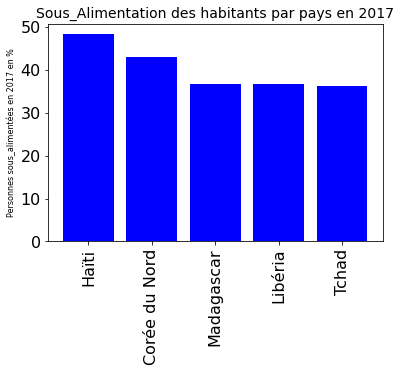

In [93]:

# Je veux afficher le top 5 ou 10 ... des pays.

Top = 5

# La taille de la figure

fs= 15

# La taille des labels

s = fs + 1

# La taille des titres

t = s -2

xQ3_3= [u"Haïti",
       u"Corée du Nord",
       u"Madagascar",
       u"Libéria",
       u"Tchad"]
yQ3_3= QBonus_Rep['Personnes sous-alimentées en % de 2013 à 2015 inclus en moyenne'].head(Top)
plt.bar(xQ3_3,yQ3_3, color ='b')
plt.xticks(fontsize=s, rotation = "vertical")
plt.yticks(fontsize=s)
plt.ylabel(u"Personnes sous_alimentées en 2017 en %",fontsize=s-8 , rotation ="vertical")
plt.title(u"Sous_Alimentation des habitants par pays en 2017",fontsize=t)

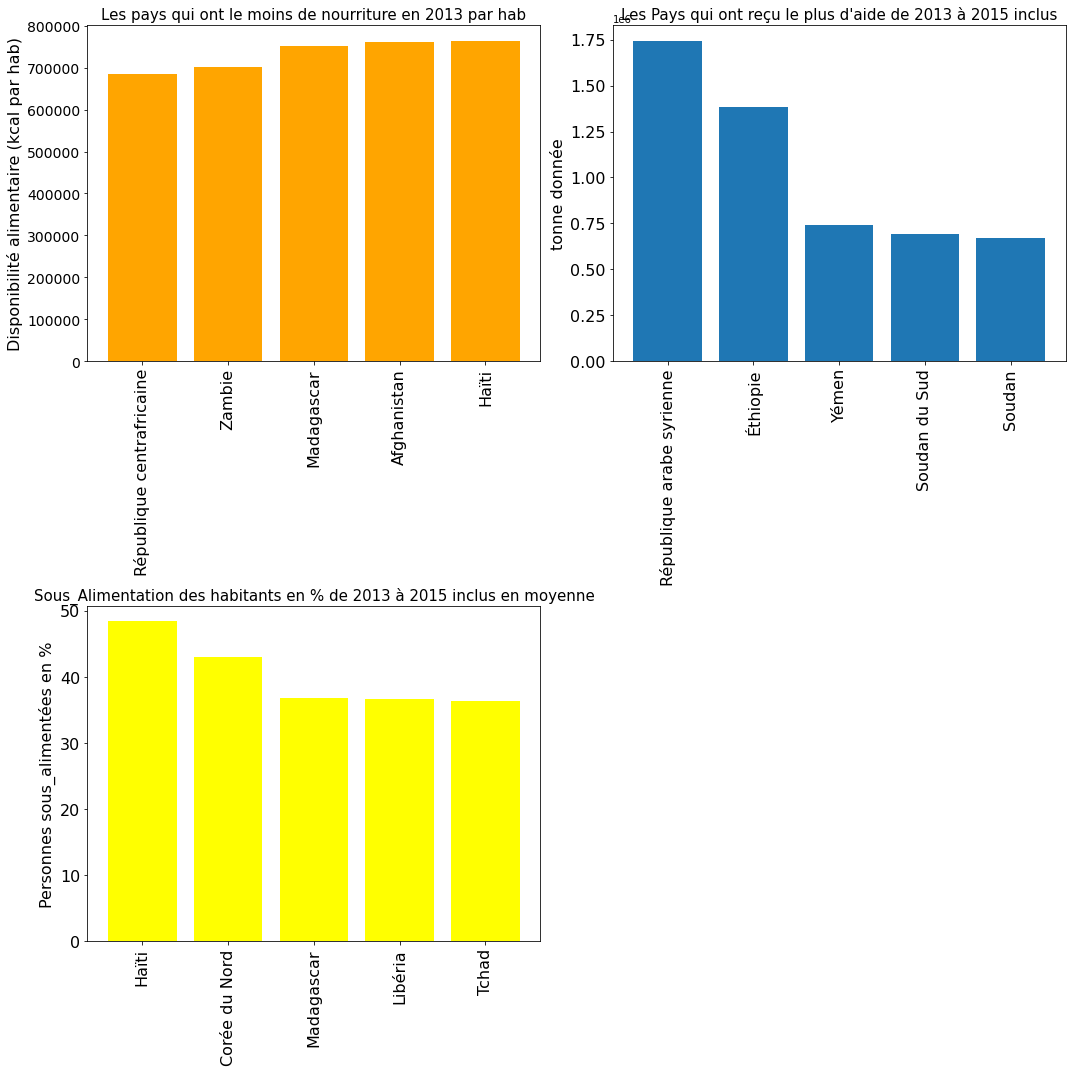

In [94]:

plt.figure(figsize=(fs,fs))

plt.subplot(2,2,1)

xQ3= Q3_Melanie_moins_nourri["Pays"].head(Top)
yQ3= Q3_Melanie_moins_nourri['Disponibilité alimentaire en 2013 en kcal par habitant du pays'].head(Top)
plt.bar(xQ3,yQ3, color ='orange')
plt.xticks(fontsize=s, rotation = "vertical")
plt.yticks(fontsize=s-2)
plt.ylabel(u"Disponibilité alimentaire (kcal par hab)",fontsize=s , rotation ="vertical")
plt.title(u"Les pays qui ont le moins de nourriture en 2013 par hab",fontsize=t+1)


plt.subplot(2,2,2)

YQ3_2 = Q2_Melanie_2013_2015['Quantité donnée en sommant en tonne de 2013 à 2015'].head(Top)
XQ3_2 =  [u'République arabe syrienne',
         u'Éthiopie',
         u'Yémen',
         u'Soudan du Sud',
         u'Soudan']
plt.bar(XQ3_2,YQ3_2)
plt.xticks(fontsize=s, rotation = "vertical")
plt.yticks(fontsize=s)
plt.ylabel(u"tonne donnée",fontsize=s , rotation ="vertical")
plt.title(u"Les Pays qui ont reçu le plus d'aide de 2013 à 2015 inclus",fontsize=t+1)

plt.subplot(2,2,3)

xQ3_3= [u"Haïti",
       u"Corée du Nord",
       u"Madagascar",
       u"Libéria",
       u"Tchad"]
yQ3_3= QBonus_Rep['Personnes sous-alimentées en % de 2013 à 2015 inclus en moyenne'].head(Top)
plt.bar(xQ3_3,yQ3_3, color ='yellow')
plt.xticks(fontsize=s, rotation = "vertical")
plt.yticks(fontsize=s)
plt.ylabel(u"Personnes sous_alimentées en %",fontsize=s , rotation ="vertical")
plt.title(u"Sous_Alimentation des habitants en % de 2013 à 2015 inclus en moyenne",fontsize=t+1)

plt.tight_layout()



In [95]:
Q2_Melanie_2013_2015.loc["Haïti"]

Quantité donnée en sommant en tonne de 2013 à 2015    103988
Name: Haïti, dtype: int64

In [96]:
Q2_Melanie_2013_2015.loc["Madagascar"]

Quantité donnée en sommant en tonne de 2013 à 2015    96678
Name: Madagascar, dtype: int64

In [97]:
Sous_Nutrition_2013_2015_Pays.loc["République arabe syrienne"]

Nbres Personnes Sous-alimentées en millier habitant    0.0
Name: République arabe syrienne, dtype: float64